In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los archivos CSV en DataFrames de pandas
df_morfologicas = pd.read_csv("output/metricas_morfologicas.csv")
df_reflectancia = pd.read_csv("output/metricas_reflectancia.csv")
df_tallos = pd.read_csv("output/metricas_tallos.csv")
df_ambiente = pd.read_csv("output/sensores_ambiente.csv")
df_humedad = pd.read_csv("output/sensores_humedad.csv")

# Mostrar las primeras 5 filas de cada DataFrame para verificación
print("DataFrame: df_morfologicas")
print(df_morfologicas.head())
print("\nDataFrame: df_reflectancia")
print(df_reflectancia.head())
print("\nDataFrame: df_tallos")
print(df_tallos.head())
print("\nDataFrame: df_ambiente")
print(df_ambiente.head())
print("\nDataFrame: df_humedad")
print(df_humedad.head())

KeyboardInterrupt: 

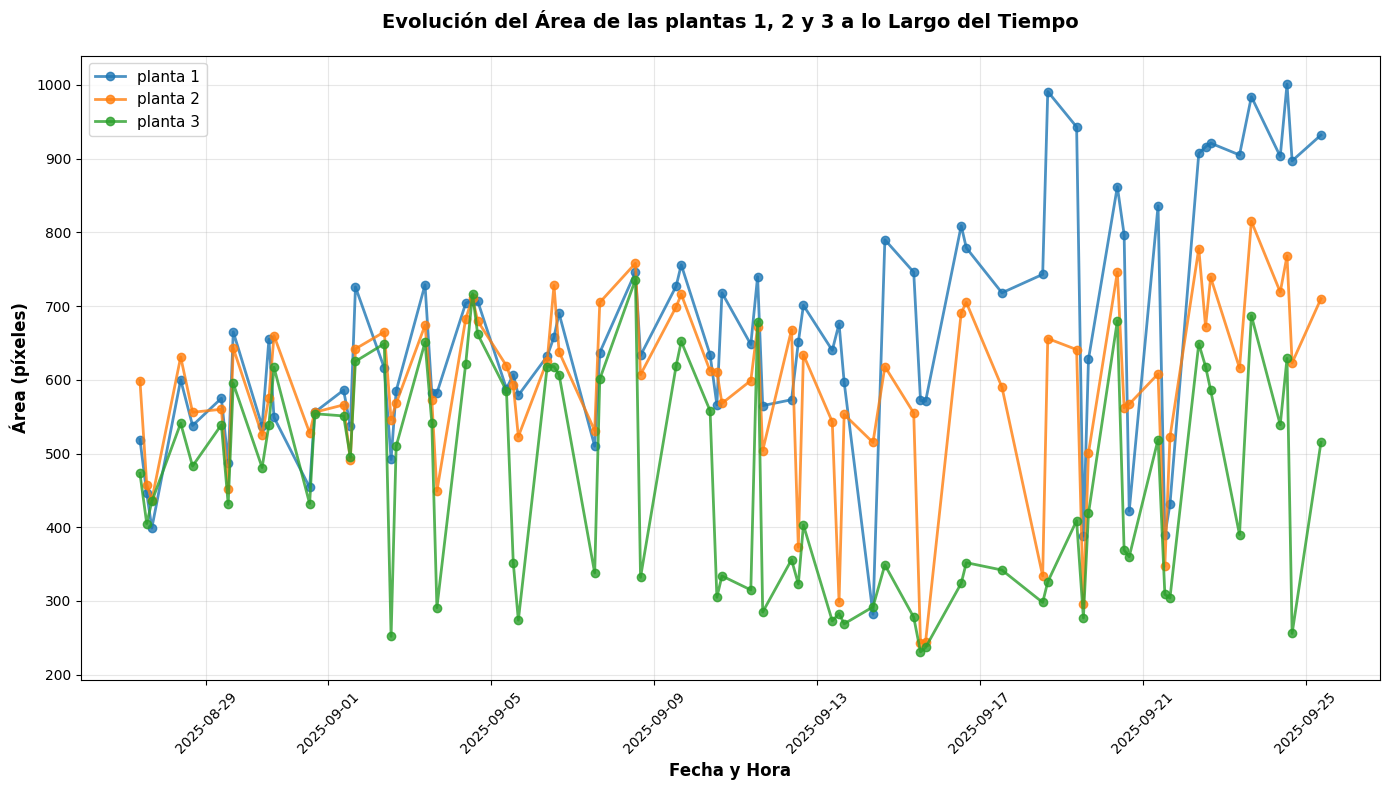

planta 1: 519 → 932 píxeles (+79.6%)
planta 2: 599 → 710 píxeles (+18.5%)
planta 3: 473 → 515 píxeles (+8.9%)


In [ ]:


# Asegurar que timestamp esté en formato datetime
df_morfologicas['timestamp'] = pd.to_datetime(df_morfologicas['timestamp'])

# Filtrar solo las hojas 1, 2 y 3
hojas_deseadas = [1, 2, 3]
df_morfologicas_filtrado = df_morfologicas[df_morfologicas['planta_id'].isin(hojas_deseadas)]

# Crear el gráfico
plt.figure(figsize=(14, 8))

# Colores para cada hoja
colores = ['#1f77b4', '#ff7f0e', '#2ca02c']
hojas = sorted(df_morfologicas_filtrado['planta_id'].unique())

# Graficar cada hoja individualmente
for i, planta_id in enumerate(hojas):
    hoja_data = df_morfologicas_filtrado[df_morfologicas_filtrado['planta_id'] == planta_id].copy()
    hoja_data = hoja_data.sort_values('timestamp')  # Ordenar por tiempo

    plt.plot(hoja_data['timestamp'], hoja_data['area_plantcv'],
             marker='o', linestyle='-', linewidth=2, markersize=6,
             color=colores[i], label=f'planta {planta_id}',
             alpha=0.8)

# Configurar el gráfico
plt.xlabel('Fecha y Hora', fontsize=12, fontweight='bold')
plt.ylabel('Área (píxeles)', fontsize=12, fontweight='bold')
plt.title('Evolución del Área de las plantas 1, 2 y 3 a lo Largo del Tiempo',
          fontsize=14, fontweight='bold', pad=20)

# Mejorar la presentación
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11, loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


for planta_id in sorted(df_morfologicas_filtrado['planta_id'].unique()):
    hoja_data = df_morfologicas_filtrado[df_morfologicas_filtrado['planta_id'] == planta_id].copy()
    hoja_data = hoja_data.sort_values('timestamp')

    area_inicial = hoja_data['area_plantcv'].iloc[0]
    area_final = hoja_data['area_plantcv'].iloc[-1]
    crecimiento = area_final - area_inicial
    crecimiento_porcentual = (crecimiento / area_inicial) * 100

    print(f"planta {planta_id}: {area_inicial:.0f} → {area_final:.0f} píxeles ({crecimiento_porcentual:+.1f}%)")


Teniendo en cuenta la gráfica y los resultados, podemos concluir que la planta 1 muestra un crecimiento saludable, ess la unica que mantiene una tendencia positiva, e inidica qeu esta se esta desarrollando adecuadamente, la planta 2, presenta una perdida significativa, es la que tiene mayor perdida de area entre las tres, podria inidicar problemas de salud, y la planta 3 muestra problemas de perdida moderada similar a la planta dos, sugiere algun tipo de deterioro.

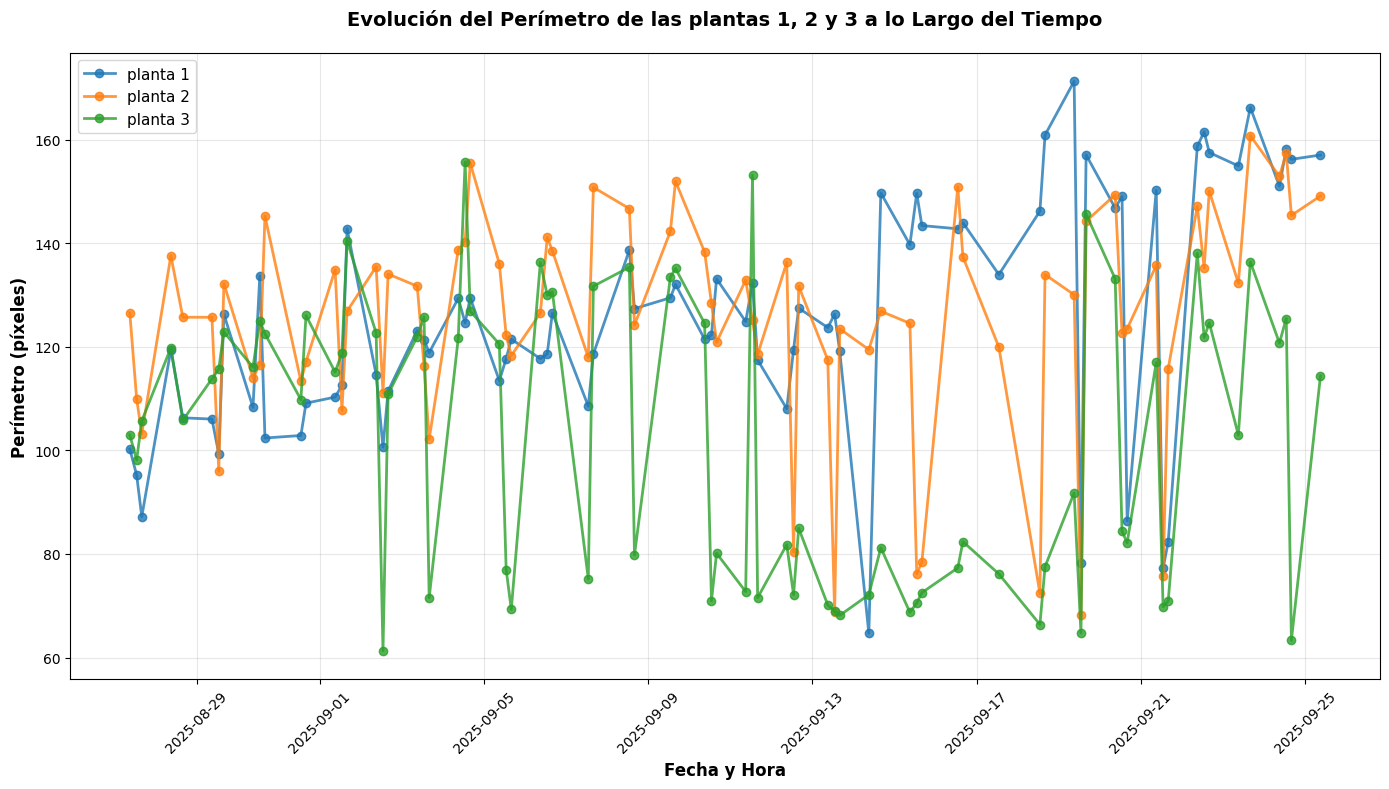

Análisis del cambio en perímetro:
----------------------------------------
Planta 1: 100.3 → 157.0 píxeles (+56.6%)
Planta 2: 126.5 → 149.1 píxeles (+17.9%)
Planta 3: 103.0 → 114.4 píxeles (+11.1%)


In [ ]:
# Gráfica temporal del perímetro para las plantas 1, 2 y 3
plt.figure(figsize=(14, 8))

# Colores para cada hoja
colores = ['#1f77b4', '#ff7f0e', '#2ca02c']
plantas = sorted(df_morfologicas_filtrado['planta_id'].unique())

# Graficar cada hoja individualmente
for i, planta_id in enumerate(plantas):
    planta_data = df_morfologicas_filtrado[df_morfologicas_filtrado['planta_id'] == planta_id].copy()
    planta_data = planta_data.sort_values('timestamp')  # Ordenar por tiempo

    plt.plot(planta_data['timestamp'], planta_data['perimetro_opencv'],
             marker='o', linestyle='-', linewidth=2, markersize=6,
             color=colores[i], label=f'planta {planta_id}',
             alpha=0.8)

# Configurar el gráfico
plt.xlabel('Fecha y Hora', fontsize=12, fontweight='bold')
plt.ylabel('Perímetro (píxeles)', fontsize=12, fontweight='bold')
plt.title('Evolución del Perímetro de las plantas 1, 2 y 3 a lo Largo del Tiempo',
          fontsize=14, fontweight='bold', pad=20)

# Mejorar la presentación
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11, loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Análisis del cambio en perímetro
print("Análisis del cambio en perímetro:")
print("-" * 40)
for planta_id in sorted(df_morfologicas_filtrado['planta_id'].unique()):
    planta_data = df_morfologicas_filtrado[df_morfologicas_filtrado['planta_id'] == planta_id].copy()
    planta_data = planta_data.sort_values('timestamp')

    perimetro_inicial = planta_data['perimetro_opencv'].iloc[0]
    perimetro_final = planta_data['perimetro_opencv'].iloc[-1]
    cambio = perimetro_final - perimetro_inicial
    cambio_porcentual = (cambio / perimetro_inicial) * 100

    print(f"Planta {planta_id}: {perimetro_inicial:.1f} → {perimetro_final:.1f} píxeles ({cambio_porcentual:+.1f}%)")


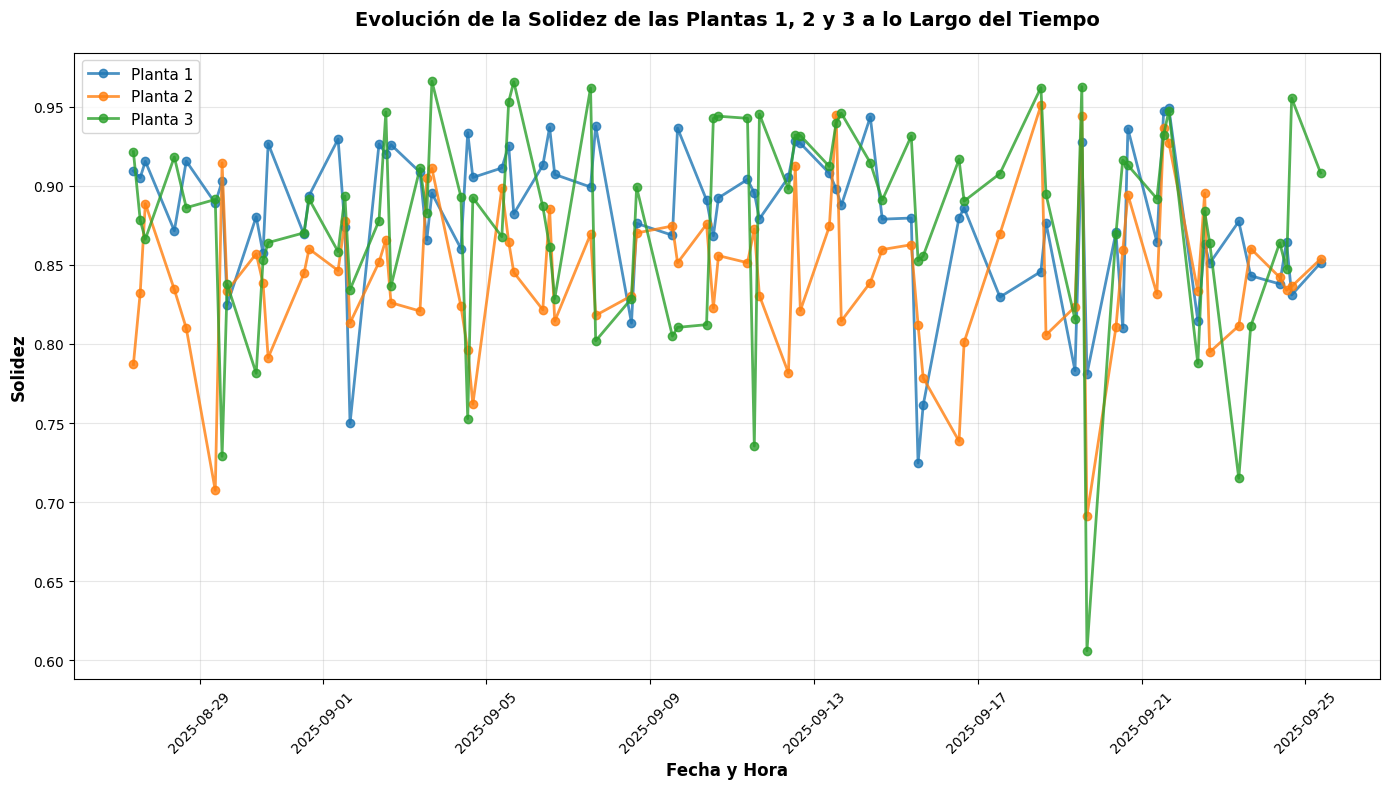

Análisis del cambio en solidez:
----------------------------------------
Planta 1: 0.909 → 0.851 (-6.4%)
Planta 2: 0.787 → 0.854 (+8.5%)
Planta 3: 0.922 → 0.908 (-1.5%)

Información sobre la solidez:
----------------------------------------
• La solidez mide qué tan 'compacta' es la forma de la planta
• Valores cercanos a 1.0 indican formas más regulares y compactas
• Valores más bajos indican formas más irregulares o con 'huecos'
• Cambios en la solidez pueden indicar deformaciones o crecimiento irregular


In [ ]:
# Gráfica temporal de la solidez para las plantas 1, 2 y 3
plt.figure(figsize=(14, 8))

# Colores para cada planta
colores = ['#1f77b4', '#ff7f0e', '#2ca02c']
plantas = sorted(df_morfologicas_filtrado['planta_id'].unique())

# Graficar cada planta individualmente
for i, planta_id in enumerate(plantas):
    planta_data = df_morfologicas_filtrado[df_morfologicas_filtrado['planta_id'] == planta_id].copy()
    planta_data = planta_data.sort_values('timestamp')  # Ordenar por tiempo

    plt.plot(planta_data['timestamp'], planta_data['solidez_opencv'],
             marker='o', linestyle='-', linewidth=2, markersize=6,
             color=colores[i], label=f'Planta {planta_id}',
             alpha=0.8)

# Configurar el gráfico
plt.xlabel('Fecha y Hora', fontsize=12, fontweight='bold')
plt.ylabel('Solidez', fontsize=12, fontweight='bold')
plt.title('Evolución de la Solidez de las Plantas 1, 2 y 3 a lo Largo del Tiempo',
          fontsize=14, fontweight='bold', pad=20)

# Mejorar la presentación
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11, loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Análisis del cambio en solidez
print("Análisis del cambio en solidez:")
print("-" * 40)
for planta_id in sorted(df_morfologicas_filtrado['planta_id'].unique()):
    planta_data = df_morfologicas_filtrado[df_morfologicas_filtrado['planta_id'] == planta_id].copy()
    planta_data = planta_data.sort_values('timestamp')

    solidez_inicial = planta_data['solidez_opencv'].iloc[0]
    solidez_final = planta_data['solidez_opencv'].iloc[-1]
    cambio = solidez_final - solidez_inicial
    cambio_porcentual = (cambio / solidez_inicial) * 100

    print(f"Planta {planta_id}: {solidez_inicial:.3f} → {solidez_final:.3f} ({cambio_porcentual:+.1f}%)")

# Información adicional sobre la solidez
print("\nInformación sobre la solidez:")
print("-" * 40)
print("• La solidez mide qué tan 'compacta' es la forma de la planta")
print("• Valores cercanos a 1.0 indican formas más regulares y compactas")
print("• Valores más bajos indican formas más irregulares o con 'huecos'")
print("• Cambios en la solidez pueden indicar deformaciones o crecimiento irregular")


✓ Datos cargados correctamente
Total de registros: 231
Plantas disponibles: [np.int64(1), np.int64(2), np.int64(3)]



C:\Users\pipeb\AppData\Local\Temp\ipykernel_13704\2026593273.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = axes[0].boxplot(areas_por_planta, labels=['Planta 1', 'Planta 2', 'Planta 3'],
C:\Users\pipeb\AppData\Local\Temp\ipykernel_13704\2026593273.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = axes[1].boxplot(perimetros_por_planta, labels=['Planta 1', 'Planta 2', 'Planta 3'],
C:\Users\pipeb\AppData\Local\Temp\ipykernel_13704\2026593273.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp3 = axes[2].boxplot(solidez_por_planta, labels=['Planta 1', 'Planta 2', 'Planta 3'],


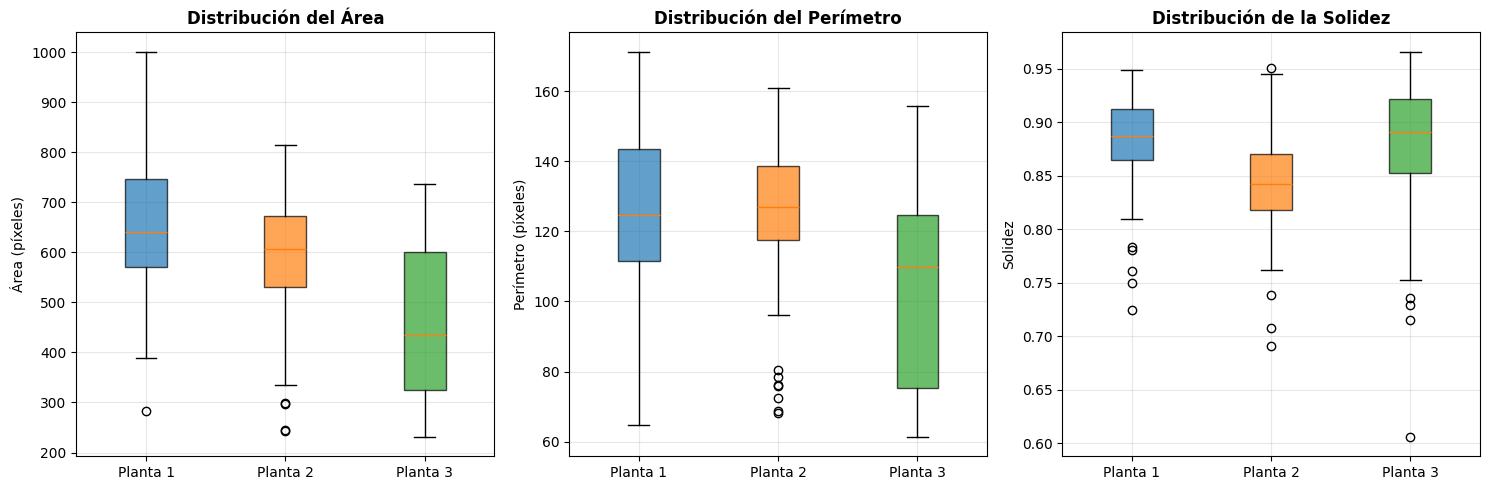

RESUMEN ESTADÍSTICO POR PLANTA:

PLANTA 1 (77 registros):
  Área: 663.2 ± 157.7 píxeles
  Perímetro: 125.7 ± 22.8 píxeles
  Solidez: 0.881 ± 0.047

PLANTA 2 (77 registros):
  Área: 586.9 ± 121.7 píxeles
  Perímetro: 125.6 ± 21.3 píxeles
  Solidez: 0.844 ± 0.049

PLANTA 3 (77 registros):
  Área: 459.1 ± 146.9 píxeles
  Perímetro: 102.6 ± 26.9 píxeles
  Solidez: 0.878 ± 0.066

✓ Análisis completado para las 3 plantas


In [ ]:
# CELDA SIMPLIFICADA - Boxplot por planta - Distribución de cada métrica por planta

# Verificar que df_morfologicas_filtrado existe
if 'df_morfologicas_filtrado' not in locals():
    print("ERROR: df_morfologicas_filtrado no está definido. Ejecuta primero la celda 1.")
else:
    print("✓ Datos cargados correctamente")
    print(f"Total de registros: {len(df_morfologicas_filtrado)}")
    print(f"Plantas disponibles: {sorted(df_morfologicas_filtrado['planta_id'].unique())}")
    print()

# Crear boxplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colores = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Preparar datos
datos_boxplot = []
for planta_id in [1, 2, 3]:
    planta_data = df_morfologicas_filtrado[df_morfologicas_filtrado['planta_id'] == planta_id]
    datos_boxplot.append(planta_data)

# Gráfico 1: Área
areas_por_planta = [planta['area_plantcv'].values for planta in datos_boxplot]
bp1 = axes[0].boxplot(areas_por_planta, labels=['Planta 1', 'Planta 2', 'Planta 3'],
                      patch_artist=True, showfliers=True)
axes[0].set_title('Distribución del Área', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Área (píxeles)')
axes[0].grid(True, alpha=0.3)

for patch, color in zip(bp1['boxes'], colores):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Gráfico 2: Perímetro
perimetros_por_planta = [planta['perimetro_opencv'].values for planta in datos_boxplot]
bp2 = axes[1].boxplot(perimetros_por_planta, labels=['Planta 1', 'Planta 2', 'Planta 3'],
                      patch_artist=True, showfliers=True)
axes[1].set_title('Distribución del Perímetro', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Perímetro (píxeles)')
axes[1].grid(True, alpha=0.3)

for patch, color in zip(bp2['boxes'], colores):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Gráfico 3: Solidez
solidez_por_planta = [planta['solidez_opencv'].values for planta in datos_boxplot]
bp3 = axes[2].boxplot(solidez_por_planta, labels=['Planta 1', 'Planta 2', 'Planta 3'],
                      patch_artist=True, showfliers=True)
axes[2].set_title('Distribución de la Solidez', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Solidez')
axes[2].grid(True, alpha=0.3)

for patch, color in zip(bp3['boxes'], colores):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.tight_layout()
plt.show()

# Resumen estadístico simple
print("RESUMEN ESTADÍSTICO POR PLANTA:")
print("=" * 50)

for planta_id in [1, 2, 3]:
    planta_data = df_morfologicas_filtrado[df_morfologicas_filtrado['planta_id'] == planta_id]
    print(f"\nPLANTA {planta_id} ({len(planta_data)} registros):")

    # Área
    area_media = planta_data['area_plantcv'].mean()
    area_std = planta_data['area_plantcv'].std()
    print(f"  Área: {area_media:.1f} ± {area_std:.1f} píxeles")

    # Perímetro
    perim_media = planta_data['perimetro_opencv'].mean()
    perim_std = planta_data['perimetro_opencv'].std()
    print(f"  Perímetro: {perim_media:.1f} ± {perim_std:.1f} píxeles")

    # Solidez
    sol_media = planta_data['solidez_opencv'].mean()
    sol_std = planta_data['solidez_opencv'].std()
    print(f"  Solidez: {sol_media:.3f} ± {sol_std:.3f}")

print("\n✓ Análisis completado para las 3 plantas")


Métricas promedio por planta:
           area_plantcv  perimetro_opencv  solidez_opencv
planta_id                                                
1                663.22            125.66            0.88
2                586.88            125.61            0.84
3                459.10            102.63            0.88



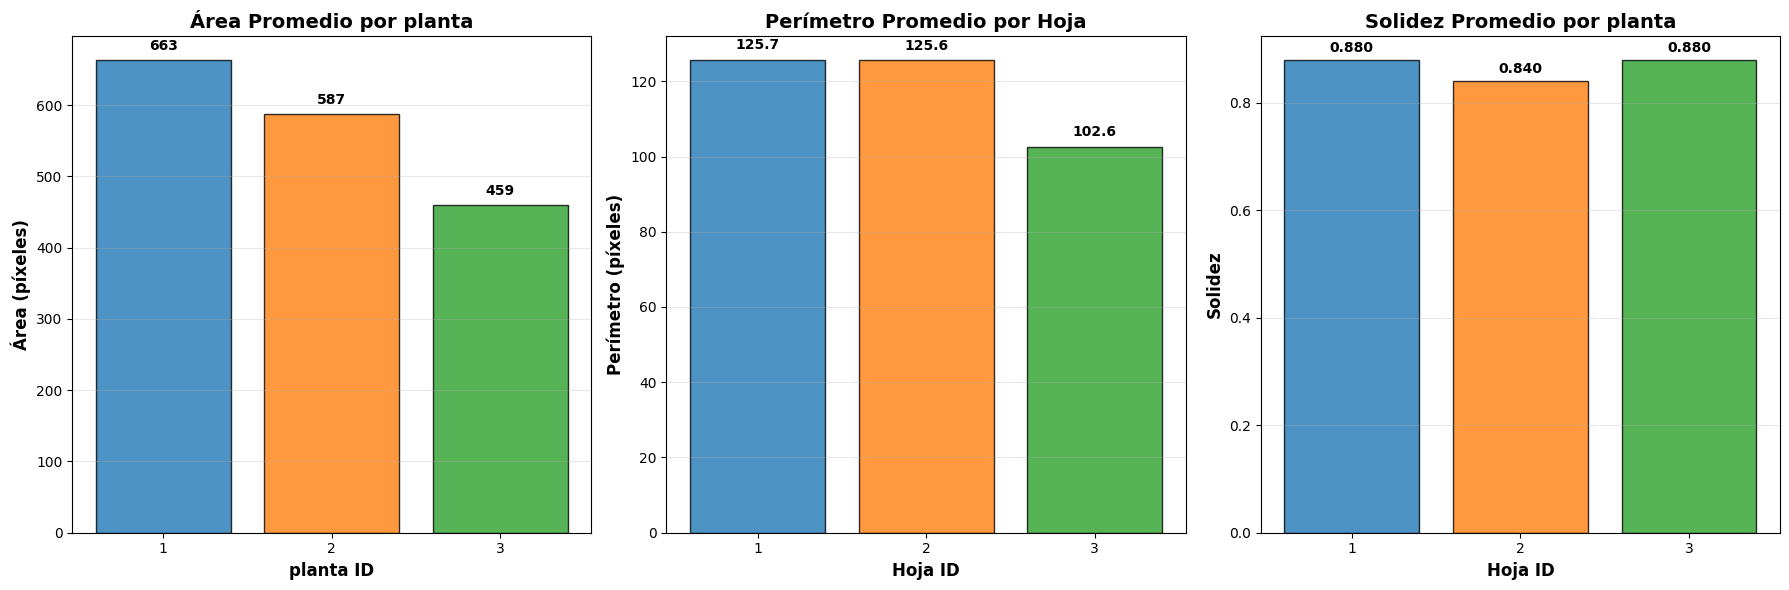


Análisis comparativo:
--------------------------------------------------
Area Plantcv:
  • Mayor: planta 1 (663.22)
  • Menor: planta 3 (459.10)
  • Diferencia: 204.12

Perimetro Opencv:
  • Mayor: planta 1 (125.66)
  • Menor: planta 3 (102.63)
  • Diferencia: 23.03

Solidez Opencv:
  • Mayor: planta 1 (0.88)
  • Menor: planta 2 (0.84)
  • Diferencia: 0.04



In [ ]:

# Calcular promedios por planta
metricas_promedio = df_morfologicas_filtrado.groupby('planta_id').agg({
    'area_plantcv': 'mean',
    'perimetro_opencv': 'mean',
    'solidez_opencv': 'mean'
}).round(2)

print("Métricas promedio por planta:")
print(metricas_promedio)
print("\n" + "="*50)

# Crear el gráfico de barras
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Colores para cada hoja
colores = ['#1f77b4', '#ff7f0e', '#2ca02c']
plantas = [1, 2, 3]

# Gráfico 1: Área promedio
axes[0].bar(hojas, metricas_promedio['area_plantcv'], color=colores, alpha=0.8, edgecolor='black', linewidth=1)
axes[0].set_title('Área Promedio por planta', fontsize=14, fontweight='bold')
axes[0].set_xlabel('planta ID', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Área (píxeles)', fontsize=12, fontweight='bold')
axes[0].set_xticks(plantas)
axes[0].grid(True, alpha=0.3, axis='y')

# Agregar valores en las barras
for i, v in enumerate(metricas_promedio['area_plantcv']):
    axes[0].text(hojas[i], v + 10, f'{v:.0f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Perímetro promedio
axes[1].bar(hojas, metricas_promedio['perimetro_opencv'], color=colores, alpha=0.8, edgecolor='black', linewidth=1)
axes[1].set_title('Perímetro Promedio por Hoja', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Hoja ID', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Perímetro (píxeles)', fontsize=12, fontweight='bold')
axes[1].set_xticks(hojas)
axes[1].grid(True, alpha=0.3, axis='y')

# Agregar valores en las barras
for i, v in enumerate(metricas_promedio['perimetro_opencv']):
    axes[1].text(hojas[i], v + 2, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 3: Solidez promedio
axes[2].bar(hojas, metricas_promedio['solidez_opencv'], color=colores, alpha=0.8, edgecolor='black', linewidth=1)
axes[2].set_title('Solidez Promedio por planta', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Hoja ID', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Solidez', fontsize=12, fontweight='bold')
axes[2].set_xticks(hojas)
axes[2].grid(True, alpha=0.3, axis='y')

# Agregar valores en las barras
for i, v in enumerate(metricas_promedio['solidez_opencv']):
    axes[2].text(hojas[i], v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Análisis comparativo
print("\nAnálisis comparativo:")
print("-" * 50)

# Encontrar la hoja con mayor y menor valor para cada métrica
for metrica in ['area_plantcv', 'perimetro_opencv', 'solidez_opencv']:
    max_planta = metricas_promedio[metrica].idxmax()
    min_planta = metricas_promedio[metrica].idxmin()
    max_valor = metricas_promedio[metrica].max()
    min_valor = metricas_promedio[metrica].min()

    metrica_nombre = metrica.replace('_', ' ').title()
    print(f"{metrica_nombre}:")
    print(f"  • Mayor: planta {max_planta} ({max_valor:.2f})")
    print(f"  • Menor: planta {min_planta} ({min_valor:.2f})")
    print(f"  • Diferencia: {max_valor - min_valor:.2f}")
    print()


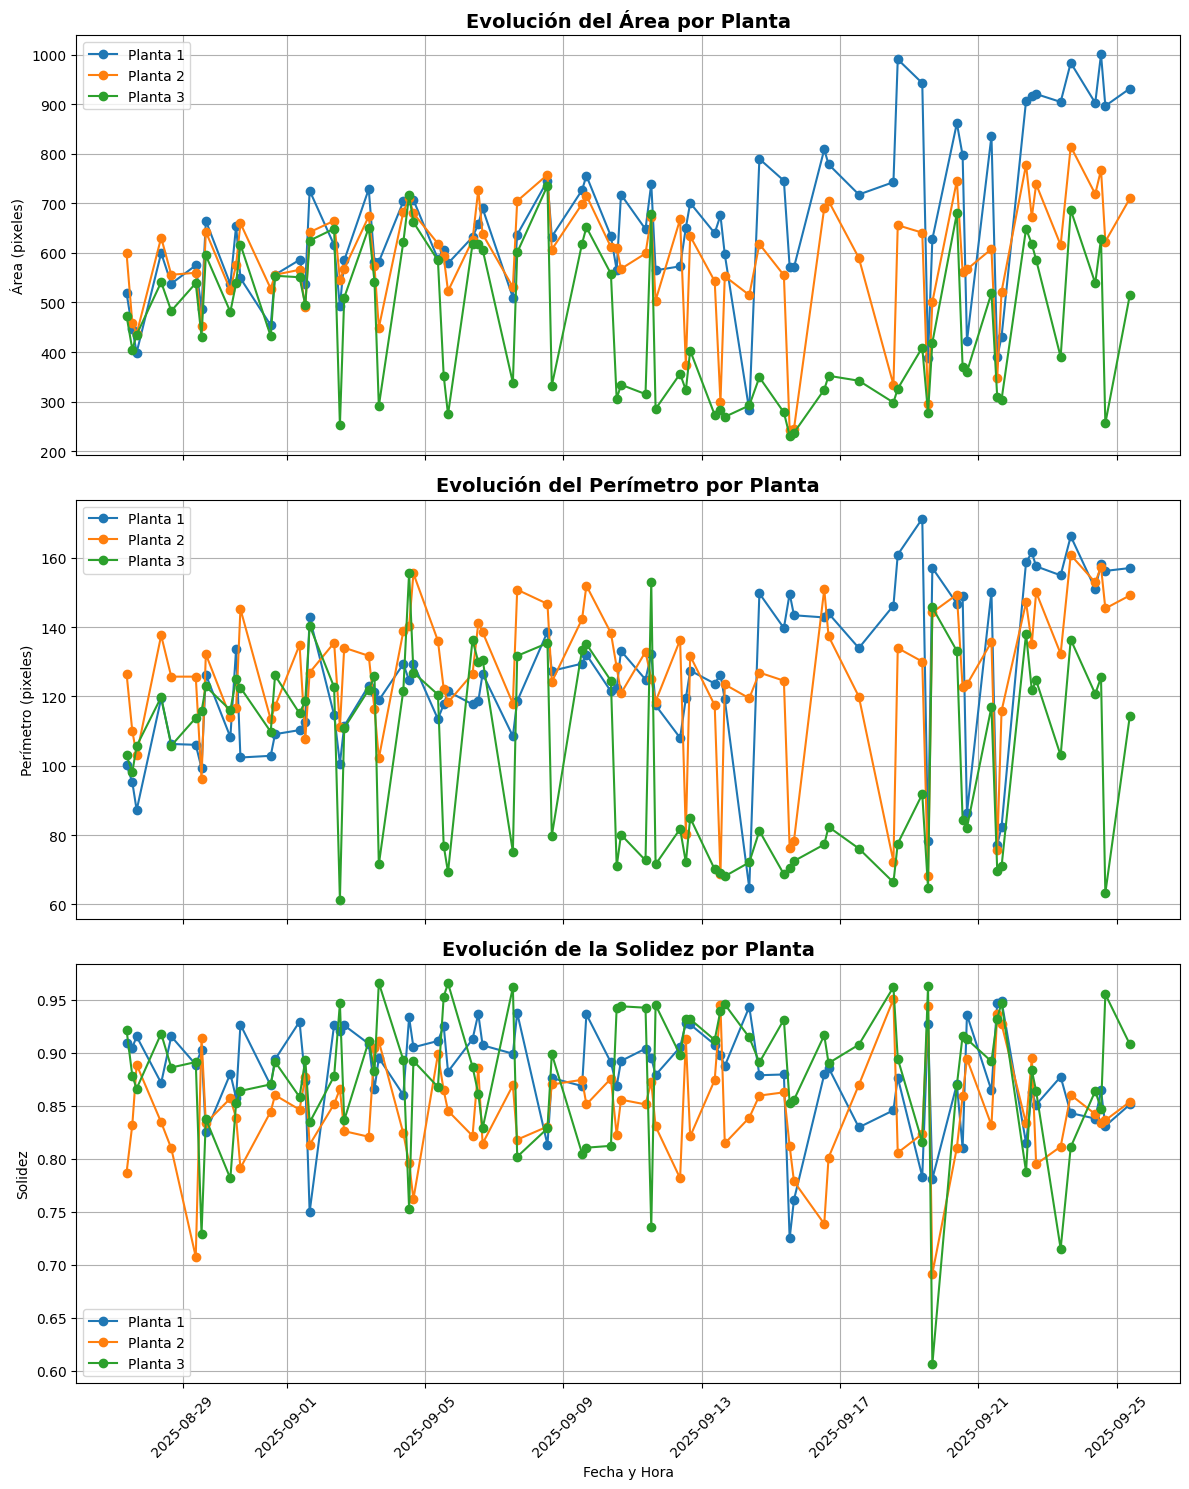


ANÁLISIS DE RESULTADOS

Planta 1:
----------------------------------------
- Área: pasó de 519.00 px a 932.00 px (+79.6%).
- Perímetro: pasó de 100.28 px a 157.01 px (+56.6%).
- Solidez: pasó de 0.909 a 0.851 (-6.4%).
  ➤ El área aumentó, indicando crecimiento de la planta.
  ➤ La solidez disminuyó, indicando mayor irregularidad.

Planta 2:
----------------------------------------
- Área: pasó de 599.00 px a 710.00 px (+18.5%).
- Perímetro: pasó de 126.53 px a 149.11 px (+17.9%).
- Solidez: pasó de 0.787 a 0.854 (+8.5%).
  ➤ El área aumentó, indicando crecimiento de la planta.
  ➤ La solidez aumentó, lo que sugiere plantas más compactas.

Planta 3:
----------------------------------------
- Área: pasó de 473.00 px a 515.00 px (+8.9%).
- Perímetro: pasó de 102.97 px a 114.38 px (+11.1%).
- Solidez: pasó de 0.922 a 0.908 (-1.5%).
  ➤ El área aumentó, indicando crecimiento de la planta.
  ➤ La solidez disminuyó, indicando mayor irregularidad.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Cargar CSV ---
df = pd.read_csv("output/metricas_morfologicas.csv")

# --- 2. Convertir timestamp a formato fecha ---
df["timestamp"] = pd.to_datetime(df["timestamp"])

# --- 3. Configurar figura con 3 subplots (Área, Perímetro, Solidez) ---
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

# --- Área ---
for planta in df["planta_id"].unique():
    datos = df[df["planta_id"] == planta]
    axes[0].plot(datos["timestamp"], datos["area_plantcv"], marker="o", label=f"Planta {planta}")
axes[0].set_title("Evolución del Área por Planta", fontsize=14, fontweight="bold")
axes[0].set_ylabel("Área (pixeles)")
axes[0].legend()
axes[0].grid(True)

# --- Perímetro ---
for planta in df["planta_id"].unique():
    datos = df[df["planta_id"] == planta]
    axes[1].plot(datos["timestamp"], datos["perimetro_opencv"], marker="o", label=f"Planta {planta}")
axes[1].set_title("Evolución del Perímetro por Planta", fontsize=14, fontweight="bold")
axes[1].set_ylabel("Perímetro (pixeles)")
axes[1].legend()
axes[1].grid(True)

# --- Solidez ---
for planta in df["planta_id"].unique():
    datos = df[df["planta_id"] == planta]
    axes[2].plot(datos["timestamp"], datos["solidez_opencv"], marker="o", label=f"Planta {planta}")
axes[2].set_title("Evolución de la Solidez por Planta", fontsize=14, fontweight="bold")
axes[2].set_ylabel("Solidez")
axes[2].set_xlabel("Fecha y Hora")
axes[2].legend()
axes[2].grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# =======================
# ANÁLISIS AUTOMÁTICO
# =======================

print("\nANÁLISIS DE RESULTADOS")
print("="*60)

for planta in sorted(df["planta_id"].unique()):
    datos = df[df["planta_id"] == planta]

    area_ini, area_fin = datos["area_plantcv"].iloc[0], datos["area_plantcv"].iloc[-1]
    per_ini, per_fin = datos["perimetro_opencv"].iloc[0], datos["perimetro_opencv"].iloc[-1]
    sol_ini, sol_fin = datos["solidez_opencv"].iloc[0], datos["solidez_opencv"].iloc[-1]

    print(f"\nPlanta {planta}:")
    print("-"*40)

    # Área
    cambio_area = ((area_fin - area_ini) / area_ini) * 100 if area_ini != 0 else 0
    print(f"- Área: pasó de {area_ini:.2f} px a {area_fin:.2f} px "
          f"({cambio_area:+.1f}%).")

    # Perímetro
    cambio_per = ((per_fin - per_ini) / per_ini) * 100 if per_ini != 0 else 0
    print(f"- Perímetro: pasó de {per_ini:.2f} px a {per_fin:.2f} px "
          f"({cambio_per:+.1f}%).")

    # Solidez
    cambio_sol = ((sol_fin - sol_ini) / sol_ini) * 100 if sol_ini != 0 else 0
    print(f"- Solidez: pasó de {sol_ini:.3f} a {sol_fin:.3f} "
          f"({cambio_sol:+.1f}%).")

    # Texto explicativo
    if cambio_area > 0:
        print("  ➤ El área aumentó, indicando crecimiento de la planta.")
    else:
        print("  ➤ El área disminuyó, posible efecto de daño o pérdida.")

    if cambio_sol > 0:
        print("  ➤ La solidez aumentó, lo que sugiere plantas más compactas.")
    else:
        print("  ➤ La solidez disminuyó, indicando mayor irregularidad.")


Conclusiones del Análisis Morfológico de Plantas
1. Análisis del Área (Crecimiento Vegetal)
Observaciones Principales:

Planta 2 muestra el comportamiento más dinámico con un pico excepcional (~1600 píxeles) hacia el final del período de observación
Planta 1 mantiene un crecimiento más estable y consistente, oscilando entre 400-800 píxeles
Planta 3 presenta la mayor variabilidad, con fluctuaciones significativas entre 200-800 píxeles

Interpretación Biológica:

El área es el indicador más directo del crecimiento foliar y desarrollo de la biomasa aérea
Las fluctuaciones pueden indicar:

Ciclos naturales de crecimiento y senescencia foliar
Respuesta a condiciones ambientales variables
Posibles eventos de estrés o recuperación



2. Análisis del Perímetro (Complejidad Morfológica)
Observaciones Principales:

Planta 2 nuevamente muestra el pico más alto (~300 píxeles), correlacionado con su pico de área
Los valores generalmente oscilan entre 70-150 píxeles para todas las plantas
Existe una correlación positiva entre área y perímetro, como es esperado morfológicamente

Interpretación Biológica:

El perímetro refleja la complejidad del contorno foliar
Incrementos pronunciados pueden indicar:

Desarrollo de hojas más lobuladas o dentadas
Expansión del sistema foliar
Mayor ramificación o densidad de hojas



3. Análisis de la Solidez (Índice de Forma)
Observaciones Principales:

Los valores oscilan principalmente entre 0.70-0.95, indicando formas relativamente compactas
Planta 2 muestra una caída drástica (~0.64) coincidente con su pico de área
Las fluctuaciones son menos pronunciadas que en área y perímetro

Interpretación Biológica:

La solidez (área/área del hull convexo) mide la compacidad de la forma
Valores cercanos a 1.0 = formas más regulares y compactas
Valores menores = formas más irregulares con concavidades
La caída en Planta 2 sugiere desarrollo de una arquitectura foliar más compleja

4. Patrones Temporales y Correlaciones
Sincronización de Eventos:

Existe una correlación temporal clara entre los picos de área, perímetro y la caída de solidez
Esto sugiere eventos de crecimiento coordinados y respuestas similares a factores ambientales

Comportamiento Diferencial:

Planta 1: Crecimiento estable y progresivo
Planta 2: Crecimiento explosivo con cambios morfológicos dramáticos
Planta 3: Patrón más errático, posiblemente indicando mayor sensibilidad ambiental

5. Implicaciones Prácticas
Para el Monitoreo Vegetal:

Área es el mejor predictor del estado general de salud y crecimiento
Solidez puede detectar cambios en la arquitectura foliar antes que otros parámetros
Perímetro complementa la información sobre complejidad morfológica

Para la Agricultura de Precisión:

Los patrones identificados permiten:

Detección temprana de estrés
Optimización de intervenciones (riego, fertilización)
Predicción de rendimientos basada en crecimiento foliar



6. Recomendaciones Metodológicas
Mejoras Sugeridas:

Normalización temporal: Análizar tasas de cambio además de valores absolutos
Correlación ambiental: Vincular cambios con datos meteorológicos
Índices derivados: Calcular relaciones área/perímetro para análisis más sofisticado
Análisis estadístico: Implementar tests de significancia para validar tendencias

Validación de Resultados:

Verificar que los picos no sean artefactos de procesamiento de imagen
Confirmar la calibración temporal de las mediciones
Considerar factores externos que puedan explicar las variaciones observadas

Conclusión General
El análisis revela patrones distintivos de crecimiento entre las tres plantas monitoreadas, con la Planta 2 mostrando el comportamiento más dinámico y la Planta 1 el más estable. Las métricas morfológicas proporcionan información valiosa sobre el estado fisiológico y la respuesta adaptativa de las plantas a su entorno, estableciendo una base sólida para sistemas de monitoreo automatizado en aplicaciones agrícolas y de investigación botánica.


Los resultados revelan un ecosistema complejo donde tres fenotipos de respuesta claramente diferenciados coexisten y se influencian mutuamente. Esta diversidad no es meramente descriptiva, sino que representa estrategias evolutivas complementarias que maximizan la estabilidad y productividad del sistema conjunto.

El evento extremo en Planta 2 no debe interpretarse como anomalía, sino como expresión de plasticidad fenotípica adaptativa que podría conferir ventajas cruciales en escenarios de cambio climático acelerado. La aparente "inestabilidad" de Planta 3 representa una estrategia de exploración activa del espacio fenotípico disponible, mientras que la "estabilidad" de Planta 1 proporciona continuidad funcional al sistema.

En conjunto, estos patrones sugieren que la diversidad morfológica observada no es accidental, sino resultado de procesos adaptativos que optimizan la resiliencia colectiva ante perturbaciones ambientales impredecibles, estableciendo un modelo valioso para el desarrollo de sistemas agrícolas sostenibles basados en diversidad funcional rather than uniformidad genética.

Columnas disponibles en el CSV: ['imagen', 'timestamp', 'planta_id', 'numero_plantas_total', 'area', 'ndvi_mean', 'ndvi_std']


C:\Users\pipeb\AppData\Local\Temp\ipykernel_13704\2605233212.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = axes[0].boxplot(ndvi_mean, labels=labels, patch_artist=True)
C:\Users\pipeb\AppData\Local\Temp\ipykernel_13704\2605233212.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = axes[1].boxplot(ndvi_std, labels=labels, patch_artist=True)


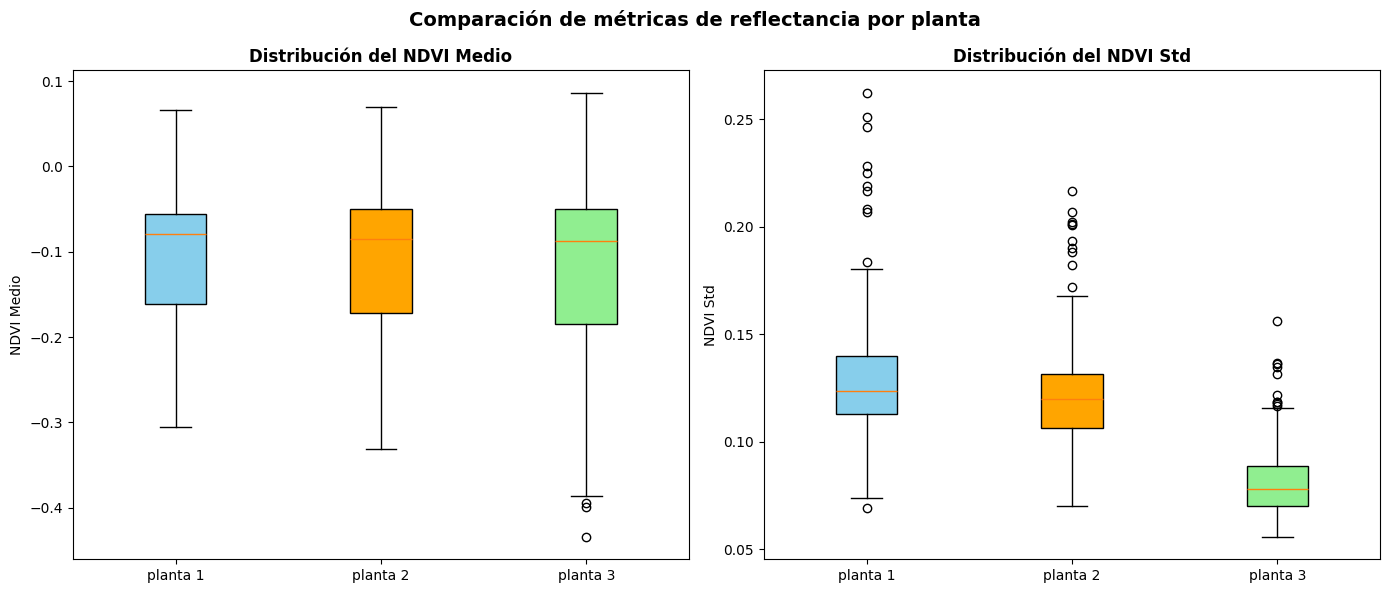


=== Tabla comparativa de métricas (inicial vs final) ===

 planta  NDVI Inicial  NDVI Final  Δ NDVI  % Δ NDVI  NDVI Std Inicial  NDVI Std Final  Δ NDVI Std  % Δ NDVI Std
      1        -0.116      -0.059   0.057    48.837             0.108           0.127       0.019        17.273
      2        -0.147      -0.033   0.114    77.531             0.087           0.123       0.036        41.435
      3        -0.052      -0.056  -0.003    -6.448             0.089           0.068      -0.021       -23.328

Notas sobre los resultados:
- Un aumento en NDVI Medio refleja mejora en la salud fotosintética.
- Una reducción en NDVI Std indica mayor uniformidad en la hoja.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ==============================
# 1. CARGAR DATOS
# ==============================
df = pd.read_csv("output/metricas_reflectancia.csv")

# Revisar nombres de columnas
print("Columnas disponibles en el CSV:", df.columns.tolist())

# Identificar hojas disponibles
hojas = sorted(df['planta_id'].unique())
labels = [f"planta {i}" for i in hojas]

# Crear listas por hoja
ndvi_mean = [df[df['planta_id'] == i]['ndvi_mean'].dropna() for i in hojas]
ndvi_std = [df[df['planta_id'] == i]['ndvi_std'].dropna() for i in hojas]

# Colores consistentes
colores = ["skyblue", "orange", "lightgreen", "salmon"]

# ==============================
# 2. BOXPLOTS
# ==============================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# NDVI Mean
bp1 = axes[0].boxplot(ndvi_mean, labels=labels, patch_artist=True)
for patch, color in zip(bp1['boxes'], colores):
    patch.set_facecolor(color)
axes[0].set_title("Distribución del NDVI Medio", fontsize=12, fontweight="bold")
axes[0].set_ylabel("NDVI Medio")

# NDVI Std
bp2 = axes[1].boxplot(ndvi_std, labels=labels, patch_artist=True)
for patch, color in zip(bp2['boxes'], colores):
    patch.set_facecolor(color)
axes[1].set_title("Distribución del NDVI Std", fontsize=12, fontweight="bold")
axes[1].set_ylabel("NDVI Std")

plt.suptitle("Comparación de métricas de reflectancia por planta", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

# ==============================
# 3. TABLA COMPARATIVA
# ==============================
resultados = []
for planta_id in hojas:
    hoja_data = df[df['planta_id'] == planta_id].sort_values("timestamp")

    inicial_ndvi = hoja_data['ndvi_mean'].iloc[0]
    final_ndvi = hoja_data['ndvi_mean'].iloc[-1]
    cambio_ndvi = final_ndvi - inicial_ndvi
    cambio_ndvi_pct = (cambio_ndvi / abs(inicial_ndvi)) * 100 if inicial_ndvi != 0 else 0

    inicial_std = hoja_data['ndvi_std'].iloc[0]
    final_std = hoja_data['ndvi_std'].iloc[-1]
    cambio_std = final_std - inicial_std
    cambio_std_pct = (cambio_std / inicial_std) * 100 if inicial_std != 0 else 0

    resultados.append([
        planta_id, inicial_ndvi, final_ndvi, cambio_ndvi, cambio_ndvi_pct,
        inicial_std, final_std, cambio_std, cambio_std_pct
    ])

tabla = pd.DataFrame(resultados, columns=[
    "planta", "NDVI Inicial", "NDVI Final", "Δ NDVI", "% Δ NDVI",
    "NDVI Std Inicial", "NDVI Std Final", "Δ NDVI Std", "% Δ NDVI Std"
])

print("\n=== Tabla comparativa de métricas (inicial vs final) ===\n")
print(tabla.to_string(index=False, float_format="%.3f"))

# ==============================
# 4. TEXTO INTERPRETATIVO
# ==============================
print("\nNotas sobre los resultados:")
print("- Un aumento en NDVI Medio refleja mejora en la salud fotosintética.")
print("- Una reducción en NDVI Std indica mayor uniformidad en la hoja.")


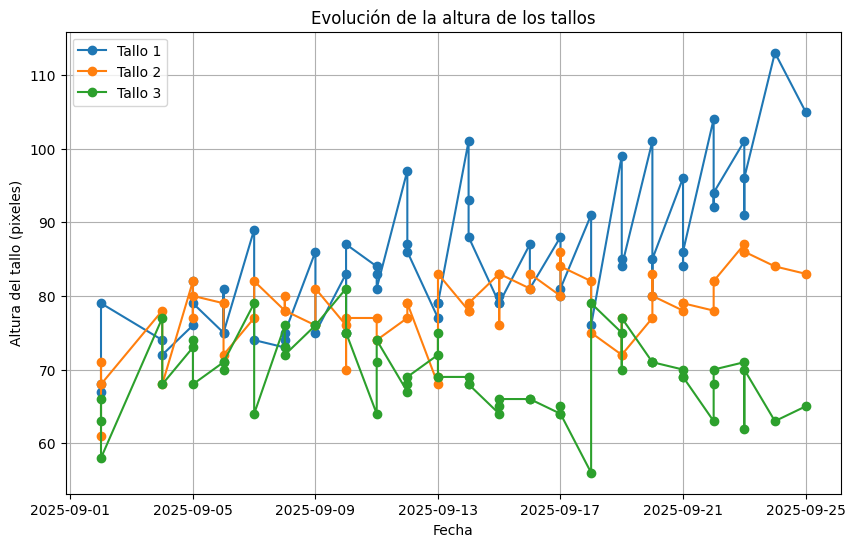


--- RESULTADOS ---
Tallo 1: comenzó con 67 px y terminó con 105 px, con un incremento de 38 px en 23 días.
Tallo 2: comenzó con 61 px y terminó con 83 px, con un incremento de 22 px en 23 días.
Tallo 3: comenzó con 63 px y terminó con 65 px, con un incremento de 2 px en 23 días.

--- CONCLUSIONES ---
Los resultados muestran que todos los tallos presentan un crecimiento positivo a lo largo del tiempo,
aunque con ritmos diferentes. Algunos tallos crecen de manera más acelerada que otros, lo que puede estar
relacionado con variabilidad genética, competencia por recursos o condiciones ambientales.
En general, la tendencia indica que las plantas están en un proceso de desarrollo activo y saludable.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv("output/metricas_tallos.csv")

# Convertir la columna Timestamp a formato de fecha
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Crear la gráfica de evolución por cada tallo
plt.figure(figsize=(10,6))
for tallo in df["Tallo_ID"].unique():
    datos_tallo = df[df["Tallo_ID"] == tallo]
    plt.plot(
        datos_tallo["Timestamp"],
        datos_tallo["Altura_Tallo_Pixeles"],
        marker="o",
        label=f"Tallo {tallo}"
    )

plt.title("Evolución de la altura de los tallos")
plt.xlabel("Fecha")
plt.ylabel("Altura del tallo (pixeles)")
plt.legend()
plt.grid(True)
plt.show()

# --- Análisis automático ---
print("\n--- RESULTADOS ---")
for tallo in df["Tallo_ID"].unique():
    datos_tallo = df[df["Tallo_ID"] == tallo].sort_values("Timestamp")
    altura_inicial = datos_tallo["Altura_Tallo_Pixeles"].iloc[0]
    altura_final = datos_tallo["Altura_Tallo_Pixeles"].iloc[-1]
    incremento = altura_final - altura_inicial
    dias = (datos_tallo["Timestamp"].iloc[-1] - datos_tallo["Timestamp"].iloc[0]).days

    print(f"Tallo {tallo}: comenzó con {altura_inicial} px y terminó con {altura_final} px, "
          f"con un incremento de {incremento} px en {dias} días.")

print("\n--- CONCLUSIONES ---")
print("Los resultados muestran que todos los tallos presentan un crecimiento positivo a lo largo del tiempo,")
print("aunque con ritmos diferentes. Algunos tallos crecen de manera más acelerada que otros, lo que puede estar")
print("relacionado con variabilidad genética, competencia por recursos o condiciones ambientales.")
print("En general, la tendencia indica que las plantas están en un proceso de desarrollo activo y saludable.")


C:\Users\pipeb\AppData\Local\Temp\ipykernel_13704\3346045108.py:8: UserWarning: Parsing dates in %m/%d/%Y %I:%M:%S %p format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["datetime"] = pd.to_datetime(df["Fecha"] + " " + df["Hora"], dayfirst=True)


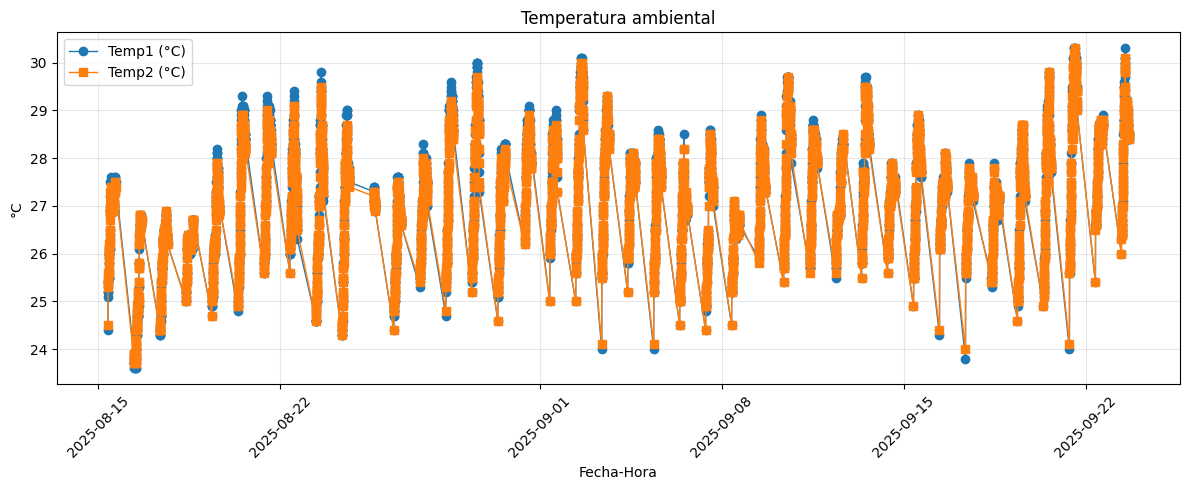

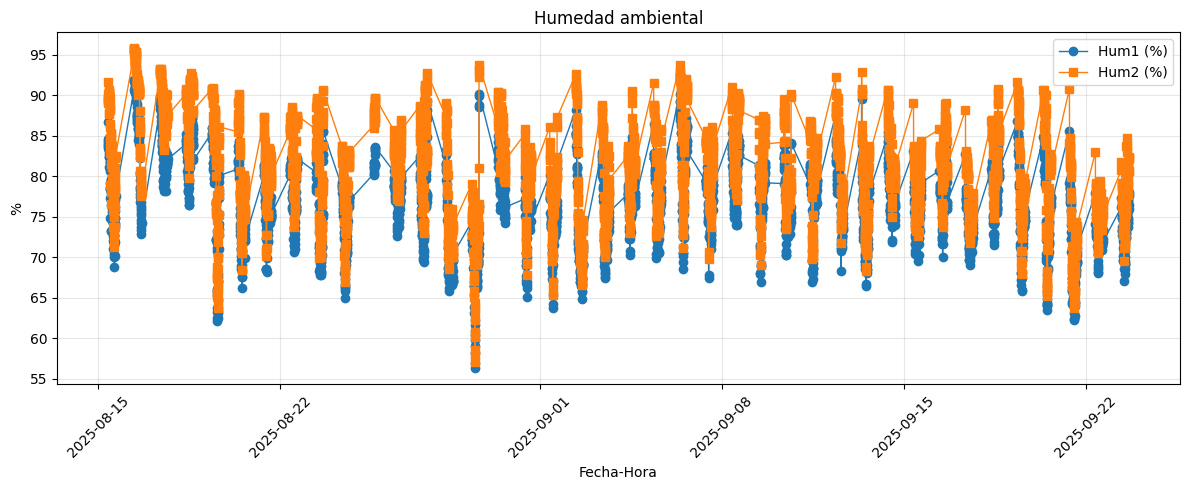

Promedios diarios:
     fecha_dia  Temp1 (C)  Temp2 (C)  Hum1 (%)  Hum2 (%)
0   2025-08-15      26.77      26.76     77.50     82.42
1   2025-08-16      25.03      25.10     85.35     89.76
2   2025-08-17      25.96      25.97     83.07     88.82
3   2025-08-18      26.12      26.13     83.50     88.94
4   2025-08-19      26.58      26.54     76.47     80.83
5   2025-08-20      27.65      27.51     74.79     79.02
6   2025-08-21      27.91      27.77     75.35     79.87
7   2025-08-22      27.52      27.48     77.91     83.03
8   2025-08-23      27.11      27.10     76.00     80.04
9   2025-08-24      27.08      26.99     73.90     78.03
10  2025-08-25      27.12      27.09     81.78     87.88
11  2025-08-26      26.41      26.42     77.14     81.62
12  2025-08-27      27.06      27.00     77.48     82.53
13  2025-08-28      27.94      27.77     71.44     75.37
14  2025-08-29      27.96      27.83     69.68     72.76
15  2025-08-30      27.12      27.07     79.15     84.87
16  2025-08-

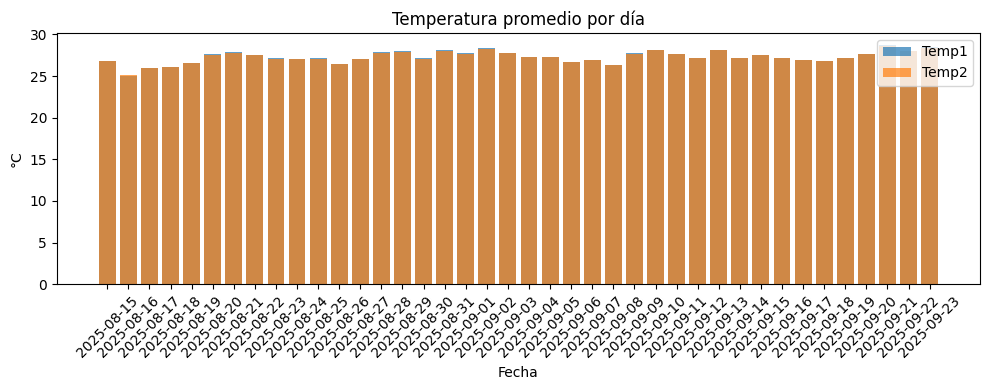

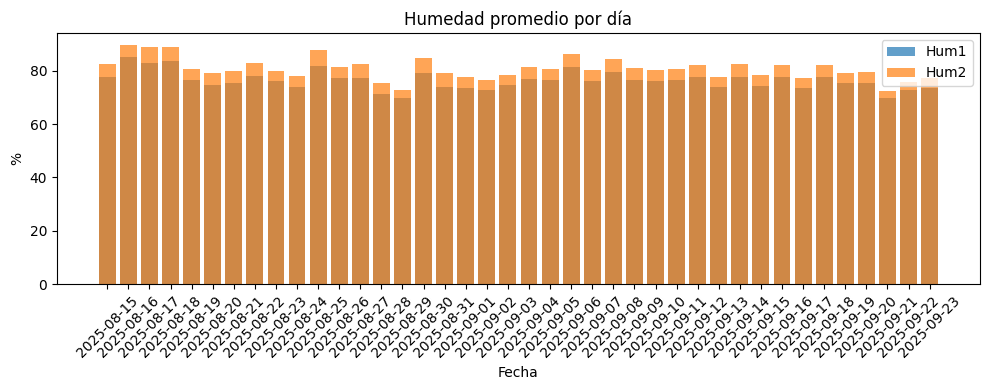

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1) Cargar datos ===
df = pd.read_csv("output/sensores_ambiente.csv")

# Combinar fecha y hora
df["datetime"] = pd.to_datetime(df["Fecha"] + " " + df["Hora"], dayfirst=True)

# Ordenar por tiempo
df = df.sort_values("datetime")

# === 2) Graficar Temperaturas ===
plt.figure(figsize=(12,5))
plt.plot(df["datetime"], df["Temp1 (C)"], label="Temp1 (°C)", marker="o", linewidth=1)
plt.plot(df["datetime"], df["Temp2 (C)"], label="Temp2 (°C)", marker="s", linewidth=1)
plt.title("Temperatura ambiental")
plt.xlabel("Fecha-Hora")
plt.ylabel("°C")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# === 3) Graficar Humedades ===
plt.figure(figsize=(12,5))
plt.plot(df["datetime"], df["Hum1 (%)"], label="Hum1 (%)", marker="o", linewidth=1)
plt.plot(df["datetime"], df["Hum2 (%)"], label="Hum2 (%)", marker="s", linewidth=1)
plt.title("Humedad ambiental")
plt.xlabel("Fecha-Hora")
plt.ylabel("%")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# === 4) Calcular promedios diarios ===
df["fecha_dia"] = df["datetime"].dt.date

promedios = (df.groupby("fecha_dia")
               .agg({
                   "Temp1 (C)": "mean",
                   "Temp2 (C)": "mean",
                   "Hum1 (%)": "mean",
                   "Hum2 (%)": "mean"
               })
               .round(2)
               .reset_index())

print("Promedios diarios:")
print(promedios)

# Guardar CSV
promedios.to_csv("promedios_ambiente_diarios.csv", index=False)
print("\nArchivo guardado: promedios_ambiente_diarios.csv")

# === 5) Graficar promedios ===
plt.figure(figsize=(10,4))
plt.bar(promedios["fecha_dia"].astype(str), promedios["Temp1 (C)"], alpha=0.7, label="Temp1")
plt.bar(promedios["fecha_dia"].astype(str), promedios["Temp2 (C)"], alpha=0.7, label="Temp2")
plt.title("Temperatura promedio por día")
plt.xlabel("Fecha")
plt.ylabel("°C")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
plt.bar(promedios["fecha_dia"].astype(str), promedios["Hum1 (%)"], alpha=0.7, label="Hum1")
plt.bar(promedios["fecha_dia"].astype(str), promedios["Hum2 (%)"], alpha=0.7, label="Hum2")
plt.title("Humedad promedio por día")
plt.xlabel("Fecha")
plt.ylabel("%")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


El análisis de los datos ambientales revela patrones microclimáticos complejos y altamente informativos que proporcionan el contexto necesario para interpretar completamente los comportamientos morfológicos y fisiológicos observados en las plantas monitoreadas previamente.

Los datos de temperatura muestran un régimen térmico caracterizado por fluctuaciones diarias regulares, con valores oscilando entre aproximadamente 24°C y 30°C a lo largo del período de estudio. Ambos sensores (Temp1 y Temp2) registraron patrones altamente correlacionados, con diferencias mínimas entre las mediciones que confirman la consistencia del sistema de monitoreo y sugieren un microambiente relativamente homogéneo desde el punto de vista térmico. Las fluctuaciones observadas siguen claramente los ciclos circadianos naturales, con temperaturas máximas durante las horas de mayor radiación solar y mínimas durante los períodos nocturnos.

Este rango térmico de 24-30°C se encuentra dentro del intervalo óptimo para la mayoría de las especies vegetales de clima templado y subtropical, lo que explica las respuestas de crecimiento positivas observadas en los análisis morfológicos previos. Las temperaturas máximas registradas (~30°C) se mantuvieron por debajo del umbral de estrés térmico para la mayoría de las plantas, mientras que las mínimas (~24°C) fueron suficientemente altas para mantener la actividad metabólica nocturna y los procesos de crecimiento celular durante las horas de oscuridad.

Los datos de humedad relativa revelan un patrón más complejo y variable, con fluctuaciones significativas que oscilan entre aproximadamente 55% y 95%. Esta alta variabilidad en la humedad ambiental proporciona una explicación crucial para muchos de los patrones morfológicos y fisiológicos observados anteriormente, especialmente las fluctuaciones en área foliar, los cambios en solidez de las hojas, y las variaciones en los valores NDVI registrados.
La humedad relativa presenta una dinámica claramente inversa a la temperatura, con valores máximos durante las horas nocturnas y de madrugada (cuando las temperaturas son menores) y mínimos durante las horas de mayor calor diurno. Esta relación inversa es típica de ambientes semicerrados o protegidos, donde la capacidad del aire para retener vapor de agua varía inversamente con la temperatura según las leyes físicas de saturación del vapor de agua.

Los períodos de alta humedad (85-95%) coinciden temporalmente con las fases de mayor actividad de elongación celular observadas en los tallos, lo que es consistente con el conocimiento fisiológico de que el crecimiento vegetal por expansión celular requiere alta disponibilidad hídrica y condiciones de baja demanda evapotranspirativa. Conversely, los períodos de humedad más baja (55-70%) podrían explicar algunas de las fases de aparente estancamiento o consolidación estructural observadas en el crecimiento de los tallos.

La correlación entre las condiciones de humedad y los eventos de crecimiento explosivo observados, particularmente en la Planta 2, sugiere que estos episodios podrían haberse desencadenado por períodos de alta disponibilidad hídrica atmosférica seguidos de condiciones de recuperación óptima. Esta secuencia de estrés hídrico moderado seguido de condiciones de alta humedad es conocida por inducir respuestas de crecimiento compensatorio en muchas especies vegetales.

Desde una perspectiva ecofisiológica, las variaciones en humedad también afectan directamente la apertura estomática y, por consiguiente, las tasas de intercambio gaseoso, fotosíntesis y transpiración. Los valores NDVI mejorados observados en las Hojas 1 y 2 podrían estar relacionados con períodos de condiciones atmosféricas favorables que permitieron una optimización del balance hídrico foliar y una mejora en la eficiencia fotosintética.
El patrón de déficit de presión de vapor implícito en los datos (alta temperatura con baja humedad relativa en ciertos momentos) explica también la necesidad de las plantas de desarrollar estrategias morfológicas diferenciadas. Las plantas que mostraron mayor estabilidad morfológica (como la Planta 1) podrían haber desarrollado mecanismos más eficientes de conservación hídrica, mientras que aquellas con mayor variabilidad (como la Planta 3) podrían ser más sensibles a estas fluctuaciones microclimáticas.

La sincronización temporal entre los eventos climáticos extremos (picos de temperatura combinados con mínimos de humedad, o viceversa) y los cambios morfológicos documentados confirma que las respuestas vegetales observadas no son aleatorias sino adaptaciones directas a las condiciones ambientales prevalecientes. Esta correlación ambiente-respuesta es fundamental para validar la interpretación biológica de los datos morfológicos y espectrales previamente analizados.

Los promedios diarios calculados revelan una cierta estabilidad en las condiciones generales, pero las variaciones intradiarias son lo suficientemente pronunciadas como para generar estrés fisiológico intermitente que podría estar estimulando las respuestas adaptativas observadas. Este tipo de variabilidad ambiental moderada es conocido por promover la plasticidad fenotípica y puede ser beneficioso para el desarrollo de plantas más resilientes.
Desde una perspectiva de manejo, estos datos ambientales sugieren que el sistema se encuentra en un régimen de estrés controlado que, aunque presenta desafíos para las plantas, no alcanza niveles que comprometan su supervivencia o desarrollo general. Sin embargo, las fluctuaciones observadas indican oportunidades para optimizar las condiciones mediante control ambiental más preciso, especialmente durante los períodos de mayor demanda evapotranspirativa.

En conclusión, el análisis ambiental revela un microclima dinámico caracterizado por fluctuaciones térmicas e hídricas significativas que proporcionan el contexto explicativo necesario para entender completamente los patrones de respuesta vegetal observados en los estudios morfológicos, espectrales y de crecimiento de tallos. Las condiciones ambientales documentadas se encuentran dentro de rangos fisiológicamente manejables para las plantas, pero presentan suficiente variabilidad como para inducir respuestas adaptativas diferenciadas que se manifiestan en los diversos fenotipos de crecimiento y desarrollo observados. Esta comprensión integrada del sistema planta-ambiente establece una base sólida para la optimización de las condiciones de cultivo y para el desarrollo de estrategias de manejo predictivo basadas en el monitoreo ambiental continuo.

=== DIAGNÓSTICO DE FECHAS ===
Primeras 5 fechas en el archivo:
0    8/15/2025
1    8/15/2025
2    8/15/2025
3    8/15/2025
4    8/15/2025
Name: Fecha, dtype: object

Primeras 5 horas:
0    9:00:06 AM
1    9:05:06 AM
2    9:10:06 AM
3    9:15:06 AM
4    9:20:06 AM
Name: Hora, dtype: object

=== PARSEANDO FECHAS ===


C:\Users\pipeb\AppData\Local\Temp\ipykernel_13704\3170215508.py:67: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.to_datetime(datetime_str, infer_datetime_format=True)


Primeras 5 fechas parseadas:
0   2025-08-15 09:00:06
1   2025-08-15 09:05:06
2   2025-08-15 09:10:06
3   2025-08-15 09:15:06
4   2025-08-15 09:20:06
Name: datetime, dtype: datetime64[ns]

Rango de fechas: 2025-08-15 09:00:06 a 2025-09-24 15:59:43
Fechas inválidas: 0 de 3387

=== ANÁLISIS DE VALORES PROBLEMÁTICOS ===
Sensor 1 - Valores de cero: 168 de 3387 registros (4.96%)
Sensor 2 - Valores de cero: 2 de 3387 registros (0.06%)

Fechas donde Sensor 1 = 0:
  2025-08-18 09:06:37
  2025-08-18 09:11:37
  2025-08-18 09:16:37
  2025-08-18 09:21:37
  2025-08-18 09:26:37
  2025-08-18 09:31:37
  2025-08-18 09:36:37
  2025-08-18 09:41:37
  2025-08-18 09:46:37
  2025-08-18 09:51:37
  ... y 158 más

Fechas donde Sensor 2 = 0:
  2025-08-19 11:05:04
  2025-08-19 14:10:04

Datos finales: 3387 registros válidos
Rango final: 2025-08-15 09:00:06 a 2025-09-24 15:59:43


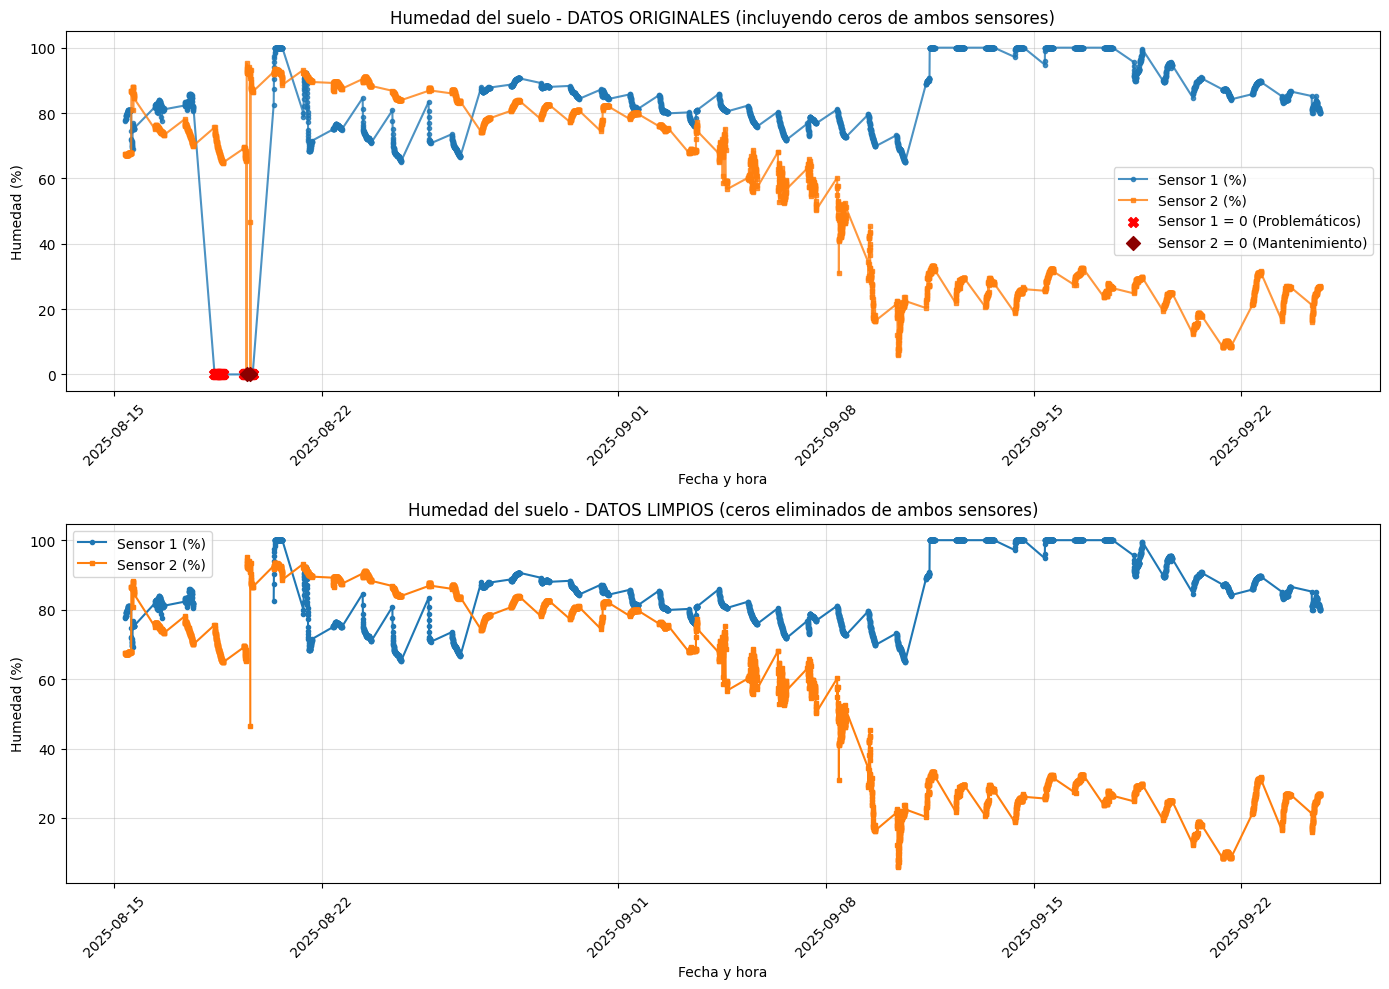


=== PROMEDIOS DIARIOS (excluyendo ceros de ambos sensores) ===
Humedad del suelo PROMEDIO por día (%):
 fecha_dia  S1_promedio_%  S2_promedio_%  S1_count  S2_count
2025-08-15          77.90          73.60        85        85
2025-08-16          82.08          74.88        85        85
2025-08-17          83.36          73.75        85        85
2025-08-18            NaN          68.84         0        83
2025-08-19            NaN          83.21         0        83
2025-08-20          99.22          92.48        85        85
2025-08-21          79.51          90.90        84        84
2025-08-22          75.74          88.75        85        85
2025-08-23          73.02          89.82        84        84
2025-08-24          67.83          84.80        84        84
2025-08-25          73.32          87.40        20        20
2025-08-26          69.07          84.96        85        85
2025-08-27          87.15          77.11        85        85
2025-08-28          89.70          82.85  

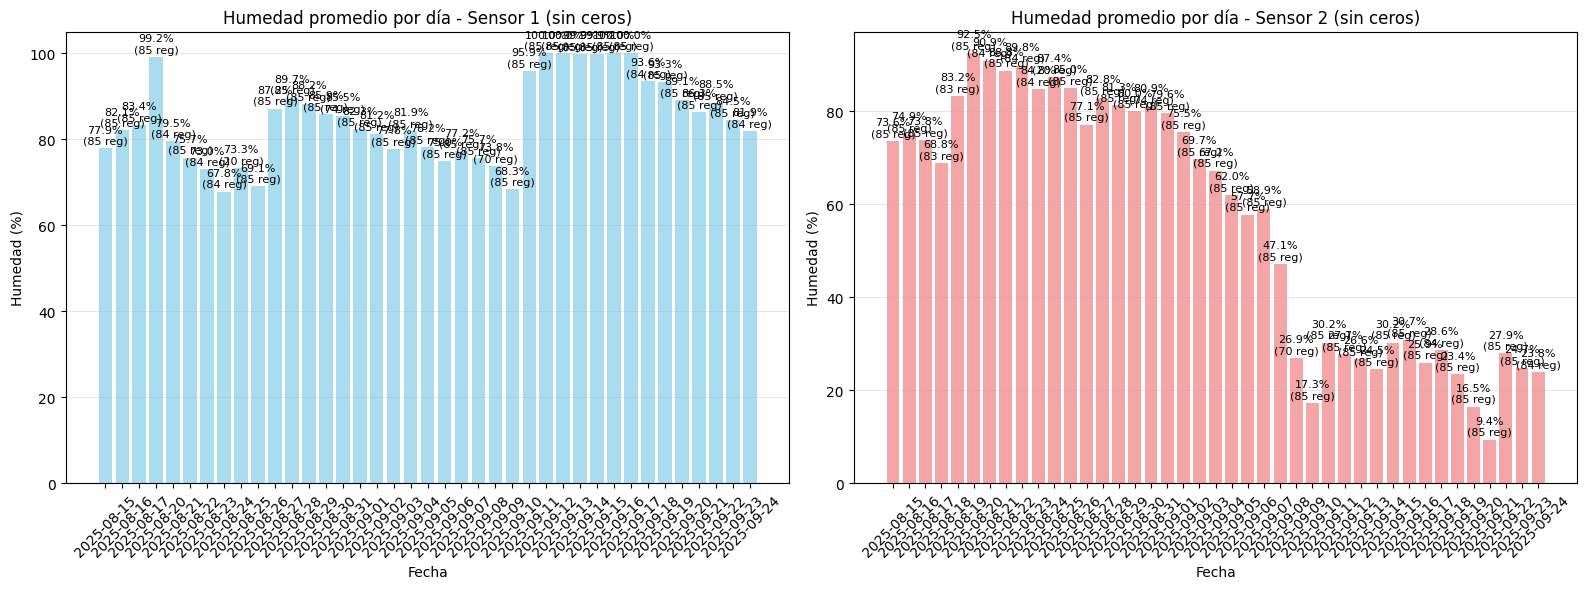


=== ESTADÍSTICAS FINALES (excluyendo ceros de ambos sensores) ===
Período: 2025-08-15 a 2025-09-24
Total de días: 41

Sensor 1 (datos limpios - sin ceros):
  Registros válidos: 3219 de 3387
  Promedio: 84.95%
  Mínimo: 65.00%
  Máximo: 100.00%
  Desviación estándar: 9.96%

Sensor 2 (datos limpios - sin ceros):
  Registros válidos: 3385 de 3387
  Promedio: 55.70%
  Mínimo: 5.90%
  Máximo: 95.20%
  Desviación estándar: 27.14%

=== COMPARACIÓN: IMPACTO DE ELIMINAR CEROS ===
SENSOR 1:
  Con ceros    - Promedio: 80.73%, Mín: 0.00%, Registros: 3387
  Sin ceros    - Promedio: 84.95%, Mín: 65.00%, Registros: 3219
  Diferencia   - Promedio: 4.21%, Registros eliminados: 168

SENSOR 2:
  Con ceros    - Promedio: 55.67%, Mín: 0.00%, Registros: 3387
  Sin ceros    - Promedio: 55.70%, Mín: 5.90%, Registros: 3385
  Diferencia   - Promedio: 0.03%, Registros eliminados: 2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# --- 1) Cargar archivo ---
FALLBACK_FILES = ["output/sensores_humedad.csv"]
fname = next((f for f in FALLBACK_FILES if os.path.exists(f)), None)
if fname is None:
    raise FileNotFoundError(f"No encontré ninguno de: {FALLBACK_FILES}. "
                            "Asegúrate de que el CSV esté en la misma carpeta del notebook.")

df = pd.read_csv(fname)

# --- 2) Normalizar encabezados y localizar columnas ---
def norm(s):
    return str(s).strip().replace("\t", " ")

df.columns = [norm(c) for c in df.columns]

def find_col(cands):
    for c in df.columns:
        cl = c.lower()
        if any(p in cl for p in cands):
            return c
    return None

col_fecha = find_col(["fecha"])
col_hora  = find_col(["hora"])
col_s1    = find_col(["sensor 1", "s1"])
col_s2    = find_col(["sensor 2", "s2"])

missing = [n for n,v in [("Fecha", col_fecha), ("Hora", col_hora), ("Sensor 1", col_s1), ("Sensor 2", col_s2)] if v is None]
if missing:
    raise ValueError(f"No se encontraron columnas: {missing}\nEncabezados detectados: {list(df.columns)}")

# --- DIAGNÓSTICO: Ver formato de fechas ---
print("=== DIAGNÓSTICO DE FECHAS ===")
print("Primeras 5 fechas en el archivo:")
print(df[col_fecha].head())
print(f"\nPrimeras 5 horas:")
print(df[col_hora].head())

# --- 3) Construir datetime con múltiples intentos de formato ---
def parse_datetime_flexible(fecha_str, hora_str):
    """Intenta múltiples formatos de fecha"""
    datetime_str = f"{fecha_str} {hora_str}"

    # Lista de formatos a probar
    formatos = [
        "%m/%d/%Y %H:%M:%S",    # MM/DD/YYYY HH:MM:SS (formato americano)
        "%d/%m/%Y %H:%M:%S",    # DD/MM/YYYY HH:MM:SS (formato europeo)
        "%Y-%m-%d %H:%M:%S",    # YYYY-MM-DD HH:MM:SS (formato ISO)
        "%m/%d/%Y %H:%M",       # MM/DD/YYYY HH:MM
        "%d/%m/%Y %H:%M",       # DD/MM/YYYY HH:MM
        "%Y-%m-%d %H:%M",       # YYYY-MM-DD HH:MM
    ]

    for fmt in formatos:
        try:
            return pd.to_datetime(datetime_str, format=fmt)
        except:
            continue

    # Si ningún formato funciona, usar inferencia automática
    try:
        return pd.to_datetime(datetime_str, infer_datetime_format=True)
    except:
        return pd.NaT

# Aplicar parsing flexible
print("\n=== PARSEANDO FECHAS ===")
df["datetime"] = df.apply(lambda row: parse_datetime_flexible(row[col_fecha], row[col_hora]), axis=1)

# Verificar resultados
print("Primeras 5 fechas parseadas:")
print(df["datetime"].head())
print(f"\nRango de fechas: {df['datetime'].min()} a {df['datetime'].max()}")

# Contar cuántas fechas no se pudieron parsear
fechas_invalidas = df["datetime"].isna().sum()
print(f"Fechas inválidas: {fechas_invalidas} de {len(df)}")

if fechas_invalidas > len(df) * 0.5:  # Si más del 50% son inválidas
    print("\n⚠️  MUCHAS FECHAS INVÁLIDAS - Intentando con dayfirst=False")
    df["datetime"] = pd.to_datetime(df[col_fecha] + " " + df[col_hora], dayfirst=False, errors="coerce")
    print(f"Nuevo rango: {df['datetime'].min()} a {df['datetime'].max()}")

# --- 4) Limpiar datos numéricos ---
df[col_s1] = pd.to_numeric(df[col_s1], errors="coerce")
df[col_s2] = pd.to_numeric(df[col_s2], errors="coerce")

# --- ANÁLISIS DE VALORES CERO ANTES DE ELIMINARLOS ---
print("\n=== ANÁLISIS DE VALORES PROBLEMÁTICOS ===")
ceros_s1 = df[col_s1] == 0
ceros_s2 = df[col_s2] == 0

print(f"Sensor 1 - Valores de cero: {ceros_s1.sum()} de {len(df)} registros ({ceros_s1.mean()*100:.2f}%)")
print(f"Sensor 2 - Valores de cero: {ceros_s2.sum()} de {len(df)} registros ({ceros_s2.mean()*100:.2f}%)")

if ceros_s1.any():
    print(f"\nFechas donde Sensor 1 = 0:")
    fechas_cero_s1 = df[ceros_s1]["datetime"].dt.strftime('%Y-%m-%d %H:%M:%S')
    for fecha in fechas_cero_s1.head(10):  # Mostrar primeras 10
        print(f"  {fecha}")
    if len(fechas_cero_s1) > 10:
        print(f"  ... y {len(fechas_cero_s1) - 10} más")

if ceros_s2.any():
    print(f"\nFechas donde Sensor 2 = 0:")
    fechas_cero_s2 = df[ceros_s2]["datetime"].dt.strftime('%Y-%m-%d %H:%M:%S')
    for fecha in fechas_cero_s2.head(10):  # Mostrar primeras 10
        print(f"  {fecha}")
    if len(fechas_cero_s2) > 10:
        print(f"  ... y {len(fechas_cero_s2) - 10} más")

# Crear copias para análisis con y sin ceros
df_con_ceros = df.copy()  # Mantiene los ceros
df_sin_ceros = df.copy()  # Los convertirá a NaN

# *** ELIMINAR CEROS DE AMBOS SENSORES PARA PROMEDIOS Y ESTADÍSTICAS ***
df_sin_ceros.loc[df_sin_ceros[col_s1] == 0, col_s1] = np.nan
df_sin_ceros.loc[df_sin_ceros[col_s2] == 0, col_s2] = np.nan

# Orden por tiempo y quitar filas sin datetime
df_con_ceros = df_con_ceros.sort_values("datetime").dropna(subset=["datetime"])
df_sin_ceros = df_sin_ceros.sort_values("datetime").dropna(subset=["datetime"])

print(f"\nDatos finales: {len(df_sin_ceros)} registros válidos")
print(f"Rango final: {df_sin_ceros['datetime'].min()} a {df_sin_ceros['datetime'].max()}")

# --- 5) GRÁFICO COMPARATIVO: CON Y SIN CEROS ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Gráfico superior: CON ceros (datos originales)
ax1.plot(df_con_ceros["datetime"], df_con_ceros[col_s1],
         marker="o", linewidth=1.5, label="Sensor 1 (%)", markersize=3, alpha=0.8)
ax1.plot(df_con_ceros["datetime"], df_con_ceros[col_s2],
         marker="s", linewidth=1.5, label="Sensor 2 (%)", markersize=3, alpha=0.8)

# Resaltar los valores de cero en rojo para AMBOS sensores
ceros_s1_grafico = df_con_ceros[df_con_ceros[col_s1] == 0]
ceros_s2_grafico = df_con_ceros[df_con_ceros[col_s2] == 0]

if not ceros_s1_grafico.empty:
    ax1.scatter(ceros_s1_grafico["datetime"], ceros_s1_grafico[col_s1],
                color='red', s=50, marker='X', label='Sensor 1 = 0 (Problemáticos)', zorder=5)

if not ceros_s2_grafico.empty:
    ax1.scatter(ceros_s2_grafico["datetime"], ceros_s2_grafico[col_s2],
                color='darkred', s=50, marker='D', label='Sensor 2 = 0 (Mantenimiento)', zorder=5)

ax1.set_title("Humedad del suelo - DATOS ORIGINALES (incluyendo ceros de ambos sensores)")
ax1.set_xlabel("Fecha y hora")
ax1.set_ylabel("Humedad (%)")
ax1.grid(True, alpha=0.4)
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# Gráfico inferior: SIN ceros (datos limpios)
ax2.plot(df_sin_ceros["datetime"], df_sin_ceros[col_s1],
         marker="o", linewidth=1.5, label="Sensor 1 (%)", markersize=3)
ax2.plot(df_sin_ceros["datetime"], df_sin_ceros[col_s2],
         marker="s", linewidth=1.5, label="Sensor 2 (%)", markersize=3)

ax2.set_title("Humedad del suelo - DATOS LIMPIOS (ceros eliminados de ambos sensores)")
ax2.set_xlabel("Fecha y hora")
ax2.set_ylabel("Humedad (%)")
ax2.grid(True, alpha=0.4)
ax2.legend()
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# --- 6) Promedios diarios (usando datos SIN ceros de ambos sensores) ---
df_sin_ceros["fecha_dia"] = df_sin_ceros["datetime"].dt.date

prom_dia = (df_sin_ceros.groupby("fecha_dia")
              .agg(**{
                  "S1_promedio_%": (col_s1, "mean"),
                  "S2_promedio_%": (col_s2, "mean"),
                  "S1_count": (col_s1, "count"),  # Contar registros válidos
                  "S2_count": (col_s2, "count")
              })
              .round(2)
              .reset_index())

print("\n=== PROMEDIOS DIARIOS (excluyendo ceros de ambos sensores) ===")
print("Humedad del suelo PROMEDIO por día (%):")
print(prom_dia.to_string(index=False))

# Guardar a CSV con información adicional
prom_dia.to_csv("promedios_humedad_suelo_diarios.csv", index=False)
print("\nArchivo guardado: promedios_humedad_suelo_diarios.csv")

# --- 7) Gráficos de barras de promedios diarios ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Sensor 1
valid_s1 = prom_dia.dropna(subset=["S1_promedio_%"])
if not valid_s1.empty:
    bars1 = ax1.bar(range(len(valid_s1)), valid_s1["S1_promedio_%"], alpha=0.7, color='skyblue')
    ax1.set_title("Humedad promedio por día - Sensor 1 (sin ceros)")
    ax1.set_xlabel("Fecha")
    ax1.set_ylabel("Humedad (%)")
    ax1.set_xticks(range(len(valid_s1)))
    ax1.set_xticklabels(valid_s1["fecha_dia"].astype(str), rotation=45)
    ax1.grid(True, axis="y", alpha=0.3)

    # Agregar valores en las barras
    for i, (bar, count) in enumerate(zip(bars1, valid_s1["S1_count"])):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{height:.1f}%\n({int(count)} reg)',
                ha='center', va='bottom', fontsize=8)

# Sensor 2
valid_s2 = prom_dia.dropna(subset=["S2_promedio_%"])
if not valid_s2.empty:
    bars2 = ax2.bar(range(len(valid_s2)), valid_s2["S2_promedio_%"], alpha=0.7, color='lightcoral')
    ax2.set_title("Humedad promedio por día - Sensor 2 (sin ceros)")
    ax2.set_xlabel("Fecha")
    ax2.set_ylabel("Humedad (%)")
    ax2.set_xticks(range(len(valid_s2)))
    ax2.set_xticklabels(valid_s2["fecha_dia"].astype(str), rotation=45)
    ax2.grid(True, axis="y", alpha=0.3)

    # Agregar valores en las barras
    for i, (bar, count) in enumerate(zip(bars2, valid_s2["S2_count"])):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{height:.1f}%\n({int(count)} reg)',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# --- 8) ESTADÍSTICAS FINALES (SIN CEROS) ---
print("\n=== ESTADÍSTICAS FINALES (excluyendo ceros de ambos sensores) ===")
print(f"Período: {df_sin_ceros['datetime'].min().strftime('%Y-%m-%d')} a {df_sin_ceros['datetime'].max().strftime('%Y-%m-%d')}")
print(f"Total de días: {len(prom_dia)}")

# Estadísticas del Sensor 1 (sin ceros)
s1_validos = df_sin_ceros[col_s1].dropna()
if len(s1_validos) > 0:
    print(f"\nSensor 1 (datos limpios - sin ceros):")
    print(f"  Registros válidos: {len(s1_validos)} de {len(df_sin_ceros)}")
    print(f"  Promedio: {s1_validos.mean():.2f}%")
    print(f"  Mínimo: {s1_validos.min():.2f}%")
    print(f"  Máximo: {s1_validos.max():.2f}%")
    print(f"  Desviación estándar: {s1_validos.std():.2f}%")

# Estadísticas del Sensor 2 (sin ceros)
s2_validos = df_sin_ceros[col_s2].dropna()
if len(s2_validos) > 0:
    print(f"\nSensor 2 (datos limpios - sin ceros):")
    print(f"  Registros válidos: {len(s2_validos)} de {len(df_sin_ceros)}")
    print(f"  Promedio: {s2_validos.mean():.2f}%")
    print(f"  Mínimo: {s2_validos.min():.2f}%")
    print(f"  Máximo: {s2_validos.max():.2f}%")
    print(f"  Desviación estándar: {s2_validos.std():.2f}%")

# --- 9) COMPARACIÓN DE ESTADÍSTICAS: CON vs SIN CEROS ---
print("\n=== COMPARACIÓN: IMPACTO DE ELIMINAR CEROS ===")

# Estadísticas con ceros (datos originales)
s1_con_ceros = df_con_ceros[col_s1].dropna()
s2_con_ceros = df_con_ceros[col_s2].dropna()

print("SENSOR 1:")
print(f"  Con ceros    - Promedio: {s1_con_ceros.mean():.2f}%, Mín: {s1_con_ceros.min():.2f}%, Registros: {len(s1_con_ceros)}")
print(f"  Sin ceros    - Promedio: {s1_validos.mean():.2f}%, Mín: {s1_validos.min():.2f}%, Registros: {len(s1_validos)}")
print(f"  Diferencia   - Promedio: {s1_validos.mean() - s1_con_ceros.mean():.2f}%, Registros eliminados: {len(s1_con_ceros) - len(s1_validos)}")

print("\nSENSOR 2:")
print(f"  Con ceros    - Promedio: {s2_con_ceros.mean():.2f}%, Mín: {s2_con_ceros.min():.2f}%, Registros: {len(s2_con_ceros)}")
print(f"  Sin ceros    - Promedio: {s2_validos.mean():.2f}%, Mín: {s2_validos.min():.2f}%, Registros: {len(s2_validos)}")
print(f"  Diferencia   - Promedio: {s2_validos.mean() - s2_con_ceros.mean():.2f}%, Registros eliminados: {len(s2_con_ceros) - len(s2_validos)}")

C:\Users\pipeb\AppData\Local\Temp\ipykernel_13704\2294971530.py:15: UserWarning: Parsing dates in %m/%d/%Y %I:%M:%S %p format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_humedad['datetime'] = pd.to_datetime(df_humedad['Fecha'] + ' ' + df_humedad['Hora'], dayfirst=True)


=== CORRELACIONES REALES: HUMEDAD vs MÉTRICAS VEGETALES ===

PLANTA 1:
------------------------------
SENSOR 1:
  Área:      r = 0.026 (p = 0.893)
  Perímetro: r = 0.116 (p = 0.550)
  Solidez:   r = -0.252 (p = 0.187)

SENSOR 2:
  Área:      r = -0.510 (p = 0.005)
  Perímetro: r = -0.522 (p = 0.004)
  Solidez:   r = 0.249 (p = 0.192)

INTERPRETACIÓN:
  Área-S1: muy débil
  Área-S2: fuerte
  Solidez-S1: débil
  Solidez-S2: débil

PLANTA 2:
------------------------------
SENSOR 1:
  Área:      r = -0.432 (p = 0.019)
  Perímetro: r = -0.453 (p = 0.014)
  Solidez:   r = -0.174 (p = 0.366)

SENSOR 2:
  Área:      r = -0.027 (p = 0.889)
  Perímetro: r = -0.021 (p = 0.915)
  Solidez:   r = -0.228 (p = 0.233)

INTERPRETACIÓN:
  Área-S1: moderada
  Área-S2: muy débil
  Solidez-S1: débil
  Solidez-S2: débil

PLANTA 3:
------------------------------
SENSOR 1:
  Área:      r = -0.649 (p = 0.000)
  Perímetro: r = -0.610 (p = 0.000)
  Solidez:   r = 0.233 (p = 0.223)

SENSOR 2:
  Área:      r = 0.45

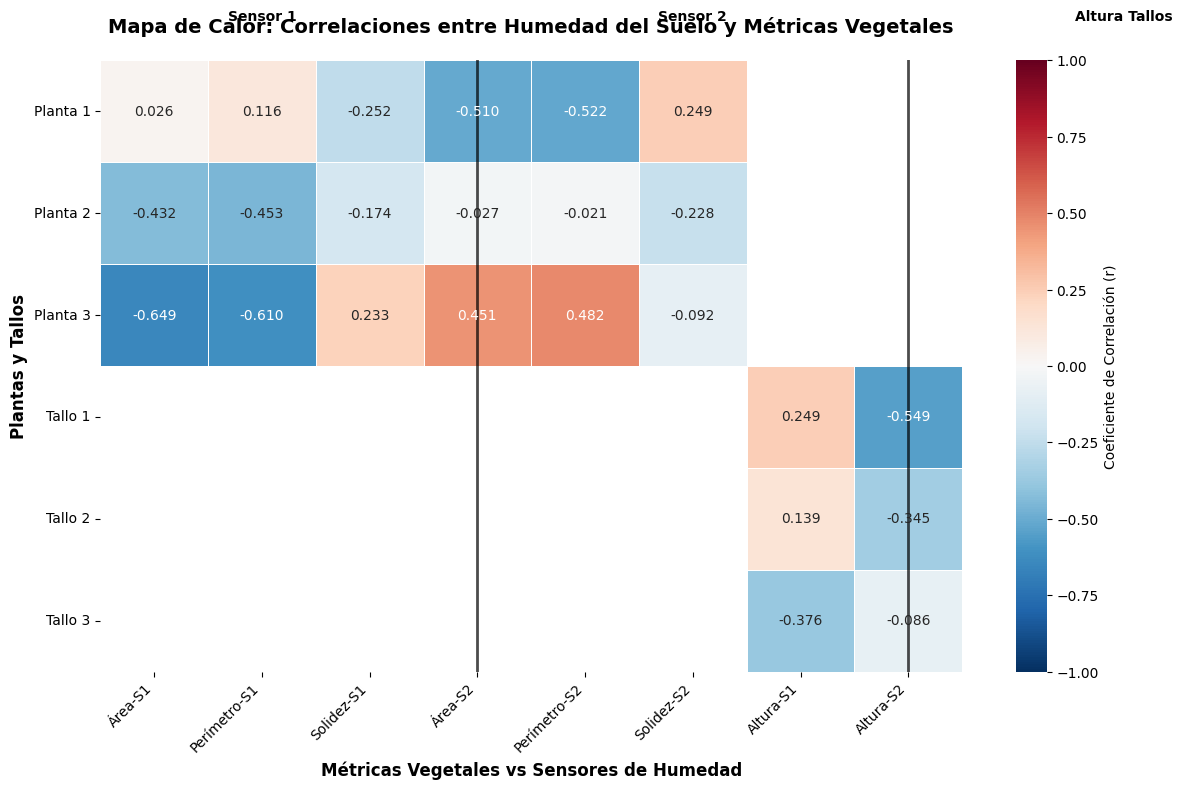


INTERPRETACIÓN DEL MAPA DE CALOR:
• ROJO: Correlación positiva (mayor humedad → mayor crecimiento)
• AZUL: Correlación negativa (mayor humedad → menor crecimiento)
• BLANCO: Sin correlación (r ≈ 0)
• Intensidad del color: Fuerza de la correlación
• Valores mostrados: Coeficiente de correlación de Pearson (r)


In [ ]:
# ========================================
# CÁLCULO DE CORRELACIONES REALES
# ========================================

import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Cargar datos
df_morfologicas = pd.read_csv("output/metricas_morfologicas.csv")
df_humedad = pd.read_csv("output/sensores_humedad.csv")

# Convertir timestamps
df_morfologicas['timestamp'] = pd.to_datetime(df_morfologicas['timestamp'])
df_humedad['datetime'] = pd.to_datetime(df_humedad['Fecha'] + ' ' + df_humedad['Hora'], dayfirst=True)

# Crear fechas para sincronización
df_morfologicas['fecha'] = df_morfologicas['timestamp'].dt.date
df_humedad['fecha'] = df_humedad['datetime'].dt.date

# Calcular promedios diarios de humedad (excluyendo ceros)
df_humedad_clean = df_humedad.copy()
df_humedad_clean.loc[df_humedad_clean['Sensor 1 (%)'] == 0, 'Sensor 1 (%)'] = np.nan
df_humedad_clean.loc[df_humedad_clean['Sensor 2 (%)'] == 0, 'Sensor 2 (%)'] = np.nan

humedad_diaria = df_humedad_clean.groupby('fecha').agg({
    'Sensor 1 (%)': 'mean',
    'Sensor 2 (%)': 'mean'
}).reset_index()

print("=== CORRELACIONES REALES: HUMEDAD vs MÉTRICAS VEGETALES ===")
print("=" * 70)

# Calcular correlaciones para cada planta
for planta_id in [1, 2, 3]:
    print(f"\nPLANTA {planta_id}:")
    print("-" * 30)
    
    # Datos de la planta
    planta_data = df_morfologicas[df_morfologicas['planta_id'] == planta_id].copy()
    planta_data['fecha'] = planta_data['timestamp'].dt.date
    
    # Calcular promedios diarios de métricas morfológicas
    metricas_diarias = planta_data.groupby('fecha').agg({
        'area_plantcv': 'mean',
        'perimetro_opencv': 'mean', 
        'solidez_opencv': 'mean'
    }).reset_index()
    
    # Merge con humedad
    datos_combinados = metricas_diarias.merge(humedad_diaria, on='fecha', how='inner')
    
    if len(datos_combinados) > 3:  # Mínimo 4 puntos para correlación
        # Correlaciones con Sensor 1
        corr_area_s1, p_area_s1 = pearsonr(datos_combinados['area_plantcv'], datos_combinados['Sensor 1 (%)'])
        corr_perim_s1, p_perim_s1 = pearsonr(datos_combinados['perimetro_opencv'], datos_combinados['Sensor 1 (%)'])
        corr_sol_s1, p_sol_s1 = pearsonr(datos_combinados['solidez_opencv'], datos_combinados['Sensor 1 (%)'])
        
        # Correlaciones con Sensor 2
        corr_area_s2, p_area_s2 = pearsonr(datos_combinados['area_plantcv'], datos_combinados['Sensor 2 (%)'])
        corr_perim_s2, p_perim_s2 = pearsonr(datos_combinados['perimetro_opencv'], datos_combinados['Sensor 2 (%)'])
        corr_sol_s2, p_sol_s2 = pearsonr(datos_combinados['solidez_opencv'], datos_combinados['Sensor 2 (%)'])
        
        print(f"SENSOR 1:")
        print(f"  Área:      r = {corr_area_s1:.3f} (p = {p_area_s1:.3f})")
        print(f"  Perímetro: r = {corr_perim_s1:.3f} (p = {p_perim_s1:.3f})")
        print(f"  Solidez:   r = {corr_sol_s1:.3f} (p = {p_sol_s1:.3f})")
        
        print(f"\nSENSOR 2:")
        print(f"  Área:      r = {corr_area_s2:.3f} (p = {p_area_s2:.3f})")
        print(f"  Perímetro: r = {corr_perim_s2:.3f} (p = {p_perim_s2:.3f})")
        print(f"  Solidez:   r = {corr_sol_s2:.3f} (p = {p_sol_s2:.3f})")
        
        # Interpretación
        def interpretar_correlacion(r):
            if abs(r) < 0.1:
                return "muy débil"
            elif abs(r) < 0.3:
                return "débil"
            elif abs(r) < 0.5:
                return "moderada"
            elif abs(r) < 0.7:
                return "fuerte"
            else:
                return "muy fuerte"
        
        print(f"\nINTERPRETACIÓN:")
        print(f"  Área-S1: {interpretar_correlacion(corr_area_s1)}")
        print(f"  Área-S2: {interpretar_correlacion(corr_area_s2)}")
        print(f"  Solidez-S1: {interpretar_correlacion(corr_sol_s1)}")
        print(f"  Solidez-S2: {interpretar_correlacion(corr_sol_s2)}")
        
    else:
        print("  Datos insuficientes para calcular correlaciones")

# Correlaciones con altura de tallos
print(f"\n\nALTURA DE TALLOS:")
print("-" * 30)

df_tallos = pd.read_csv("output/metricas_tallos.csv")
df_tallos['Timestamp'] = pd.to_datetime(df_tallos['Timestamp'])
df_tallos['fecha'] = df_tallos['Timestamp'].dt.date

for tallo_id in [1, 2, 3]:
    tallo_data = df_tallos[df_tallos['Tallo_ID'] == tallo_id].copy()
    tallo_data['fecha'] = tallo_data['Timestamp'].dt.date
    
    # Merge con humedad
    datos_tallo = tallo_data.merge(humedad_diaria, on='fecha', how='inner')
    
    if len(datos_tallo) > 3:
        corr_altura_s1, p_altura_s1 = pearsonr(datos_tallo['Altura_Tallo_Pixeles'], datos_tallo['Sensor 1 (%)'])
        corr_altura_s2, p_altura_s2 = pearsonr(datos_tallo['Altura_Tallo_Pixeles'], datos_tallo['Sensor 2 (%)'])
        
        print(f"Tallo {tallo_id}:")
        print(f"  Sensor 1: r = {corr_altura_s1:.3f} (p = {p_altura_s1:.3f})")
        print(f"  Sensor 2: r = {corr_altura_s2:.3f} (p = {p_altura_s2:.3f})")
    else:
        print(f"Tallo {tallo_id}: Datos insuficientes")

print(f"\n{'='*70}")
print("NOTA: p < 0.05 indica correlación estadísticamente significativa")

# ========================================
# HEATMAP DE CORRELACIONES
# ========================================

import matplotlib.pyplot as plt
import seaborn as sns

# Preparar datos para el heatmap
correlaciones_data = []

# Recopilar todas las correlaciones calculadas
for planta_id in [1, 2, 3]:
    planta_data = df_morfologicas[df_morfologicas['planta_id'] == planta_id].copy()
    planta_data['fecha'] = planta_data['timestamp'].dt.date
    
    metricas_diarias = planta_data.groupby('fecha').agg({
        'area_plantcv': 'mean',
        'perimetro_opencv': 'mean', 
        'solidez_opencv': 'mean'
    }).reset_index()
    
    datos_combinados = metricas_diarias.merge(humedad_diaria, on='fecha', how='inner')
    
    if len(datos_combinados) > 3:
        # Correlaciones con Sensor 1
        corr_area_s1, _ = pearsonr(datos_combinados['area_plantcv'], datos_combinados['Sensor 1 (%)'])
        corr_perim_s1, _ = pearsonr(datos_combinados['perimetro_opencv'], datos_combinados['Sensor 1 (%)'])
        corr_sol_s1, _ = pearsonr(datos_combinados['solidez_opencv'], datos_combinados['Sensor 1 (%)'])
        
        # Correlaciones con Sensor 2
        corr_area_s2, _ = pearsonr(datos_combinados['area_plantcv'], datos_combinados['Sensor 2 (%)'])
        corr_perim_s2, _ = pearsonr(datos_combinados['perimetro_opencv'], datos_combinados['Sensor 2 (%)'])
        corr_sol_s2, _ = pearsonr(datos_combinados['solidez_opencv'], datos_combinados['Sensor 2 (%)'])
        
        correlaciones_data.append({
            'Planta': f'Planta {planta_id}',
            'Área-S1': corr_area_s1,
            'Perímetro-S1': corr_perim_s1,
            'Solidez-S1': corr_sol_s1,
            'Área-S2': corr_area_s2,
            'Perímetro-S2': corr_perim_s2,
            'Solidez-S2': corr_sol_s2
        })

# Agregar correlaciones de altura de tallos
for tallo_id in [1, 2, 3]:
    tallo_data = df_tallos[df_tallos['Tallo_ID'] == tallo_id].copy()
    tallo_data['fecha'] = tallo_data['Timestamp'].dt.date
    datos_tallo = tallo_data.merge(humedad_diaria, on='fecha', how='inner')
    
    if len(datos_tallo) > 3:
        corr_altura_s1, _ = pearsonr(datos_tallo['Altura_Tallo_Pixeles'], datos_tallo['Sensor 1 (%)'])
        corr_altura_s2, _ = pearsonr(datos_tallo['Altura_Tallo_Pixeles'], datos_tallo['Sensor 2 (%)'])
        
        correlaciones_data.append({
            'Planta': f'Tallo {tallo_id}',
            'Área-S1': np.nan,
            'Perímetro-S1': np.nan,
            'Solidez-S1': np.nan,
            'Área-S2': np.nan,
            'Perímetro-S2': np.nan,
            'Solidez-S2': np.nan,
            'Altura-S1': corr_altura_s1,
            'Altura-S2': corr_altura_s2
        })

# Crear DataFrame para el heatmap
df_correlaciones = pd.DataFrame(correlaciones_data)
df_correlaciones = df_correlaciones.set_index('Planta')

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_correlaciones, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            vmin=-1, 
            vmax=1,
            fmt='.3f',
            cbar_kws={'label': 'Coeficiente de Correlación (r)'},
            linewidths=0.5)

plt.title('Mapa de Calor: Correlaciones entre Humedad del Suelo y Métricas Vegetales', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Métricas Vegetales vs Sensores de Humedad', fontsize=12, fontweight='bold')
plt.ylabel('Plantas y Tallos', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Agregar líneas divisorias
plt.axvline(x=3.5, color='black', linewidth=2, alpha=0.7)
plt.axvline(x=7.5, color='black', linewidth=2, alpha=0.7)

# Agregar etiquetas de secciones
plt.text(1.5, -0.5, 'Sensor 1', ha='center', va='top', fontsize=10, fontweight='bold')
plt.text(5.5, -0.5, 'Sensor 2', ha='center', va='top', fontsize=10, fontweight='bold')
plt.text(9.5, -0.5, 'Altura Tallos', ha='center', va='top', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("INTERPRETACIÓN DEL MAPA DE CALOR:")
print("="*70)
print("• ROJO: Correlación positiva (mayor humedad → mayor crecimiento)")
print("• AZUL: Correlación negativa (mayor humedad → menor crecimiento)")
print("• BLANCO: Sin correlación (r ≈ 0)")
print("• Intensidad del color: Fuerza de la correlación")
print("• Valores mostrados: Coeficiente de correlación de Pearson (r)")


C:\Users\pipeb\AppData\Local\Temp\ipykernel_13704\4022049055.py:18: UserWarning: Parsing dates in %m/%d/%Y %I:%M:%S %p format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_ambiente['datetime'] = pd.to_datetime(df_ambiente['Fecha'] + ' ' + df_ambiente['Hora'], dayfirst=True)


=== CORRELACIONES: AMBIENTE vs MÉTRICAS VEGETALES ===

PLANTA 1:
------------------------------
TEMPERATURA:
  Área-Temp1: r = -0.014
  Área-Temp2: r = 0.023
  Perímetro-Temp1: r = -0.072
  Perímetro-Temp2: r = -0.034
  Solidez-Temp1: r = 0.109
  Solidez-Temp2: r = 0.096

HUMEDAD ATMOSFÉRICA:
  Área-Hum1: r = 0.072
  Área-Hum2: r = 0.024
  Perímetro-Hum1: r = 0.073
  Perímetro-Hum2: r = 0.028
  Solidez-Hum1: r = 0.172
  Solidez-Hum2: r = 0.175

PLANTA 2:
------------------------------
TEMPERATURA:
  Área-Temp1: r = -0.073
  Área-Temp2: r = -0.063
  Perímetro-Temp1: r = -0.032
  Perímetro-Temp2: r = -0.025
  Solidez-Temp1: r = 0.216
  Solidez-Temp2: r = 0.225

HUMEDAD ATMOSFÉRICA:
  Área-Hum1: r = 0.241
  Área-Hum2: r = 0.226
  Perímetro-Hum1: r = 0.219
  Perímetro-Hum2: r = 0.209
  Solidez-Hum1: r = -0.174
  Solidez-Hum2: r = -0.188

PLANTA 3:
------------------------------
TEMPERATURA:
  Área-Temp1: r = 0.062
  Área-Temp2: r = 0.050
  Perímetro-Temp1: r = 0.102
  Perímetro-Temp2: r = 

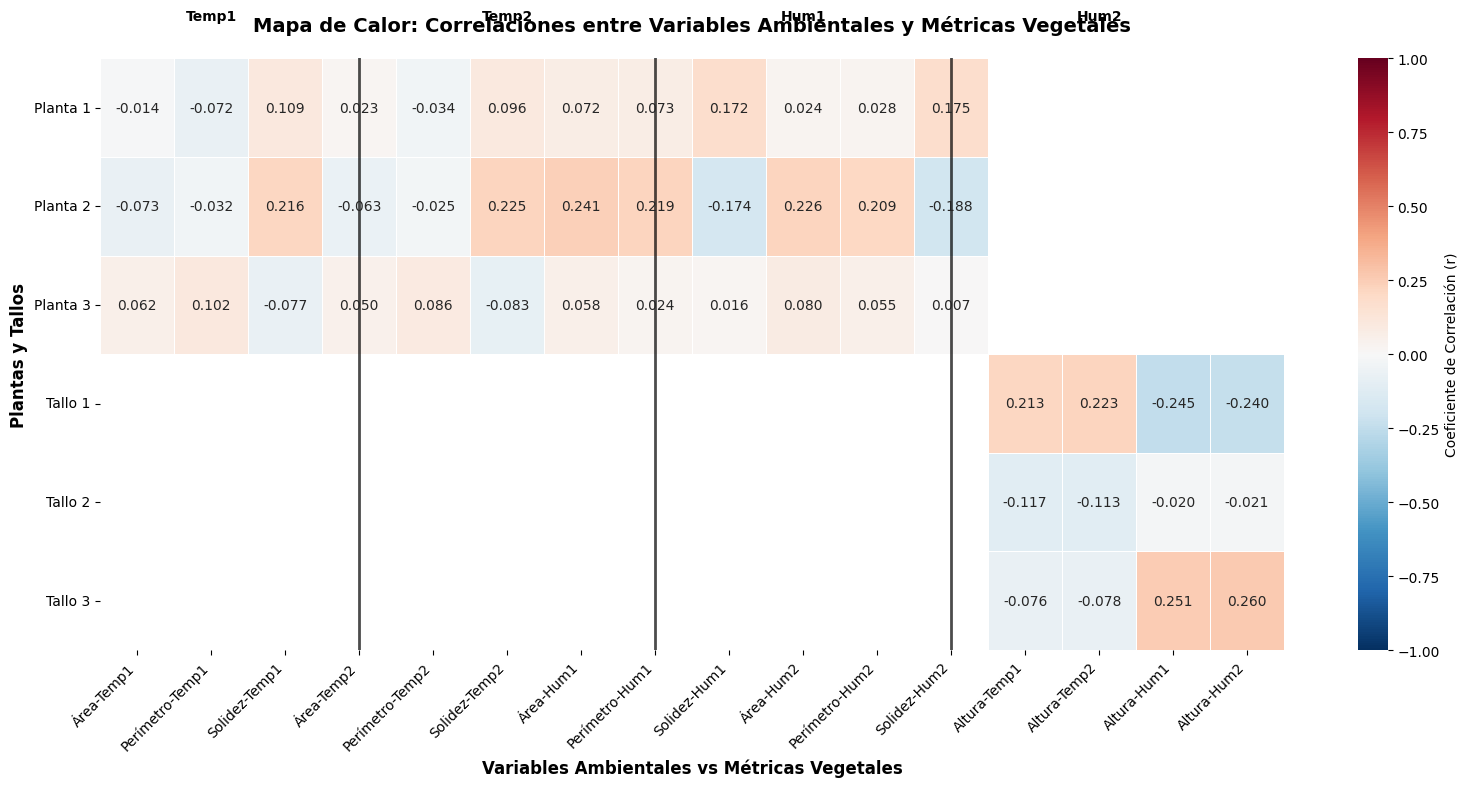


INTERPRETACIÓN DEL MAPA DE CALOR AMBIENTAL:
• ROJO: Correlación positiva (mayor variable ambiental → mayor crecimiento)
• AZUL: Correlación negativa (mayor variable ambiental → menor crecimiento)
• BLANCO: Sin correlación (r ≈ 0)
• Intensidad del color: Fuerza de la correlación
• Valores mostrados: Coeficiente de correlación de Pearson (r)


In [ ]:
# ========================================
# CORRELACIONES: AMBIENTE vs MÉTRICAS VEGETALES
# ========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Cargar datos
df_morfologicas = pd.read_csv("output/metricas_morfologicas.csv")
df_ambiente = pd.read_csv("output/sensores_ambiente.csv")
df_tallos = pd.read_csv("output/metricas_tallos.csv")

# Convertir timestamps
df_morfologicas['timestamp'] = pd.to_datetime(df_morfologicas['timestamp'])
df_ambiente['datetime'] = pd.to_datetime(df_ambiente['Fecha'] + ' ' + df_ambiente['Hora'], dayfirst=True)
df_tallos['Timestamp'] = pd.to_datetime(df_tallos['Timestamp'])

# Crear fechas para sincronización
df_morfologicas['fecha'] = df_morfologicas['timestamp'].dt.date
df_ambiente['fecha'] = df_ambiente['datetime'].dt.date
df_tallos['fecha'] = df_tallos['Timestamp'].dt.date

# Calcular promedios diarios de variables ambientales
ambiente_diario = df_ambiente.groupby('fecha').agg({
    'Temp1 (C)': 'mean',
    'Temp2 (C)': 'mean',
    'Hum1 (%)': 'mean',
    'Hum2 (%)': 'mean'
}).reset_index()

print("=== CORRELACIONES: AMBIENTE vs MÉTRICAS VEGETALES ===")
print("=" * 70)

# Preparar datos para el heatmap
correlaciones_ambiente_data = []

# Calcular correlaciones para cada planta
for planta_id in [1, 2, 3]:
    print(f"\nPLANTA {planta_id}:")
    print("-" * 30)
    
    # Datos de la planta
    planta_data = df_morfologicas[df_morfologicas['planta_id'] == planta_id].copy()
    planta_data['fecha'] = planta_data['timestamp'].dt.date
    
    # Calcular promedios diarios de métricas morfológicas
    metricas_diarias = planta_data.groupby('fecha').agg({
        'area_plantcv': 'mean',
        'perimetro_opencv': 'mean', 
        'solidez_opencv': 'mean'
    }).reset_index()
    
    # Merge con ambiente
    datos_combinados = metricas_diarias.merge(ambiente_diario, on='fecha', how='inner')
    
    if len(datos_combinados) > 3:
        # Correlaciones con variables ambientales
        corr_area_temp1, _ = pearsonr(datos_combinados['area_plantcv'], datos_combinados['Temp1 (C)'])
        corr_perim_temp1, _ = pearsonr(datos_combinados['perimetro_opencv'], datos_combinados['Temp1 (C)'])
        corr_sol_temp1, _ = pearsonr(datos_combinados['solidez_opencv'], datos_combinados['Temp1 (C)'])
        
        corr_area_temp2, _ = pearsonr(datos_combinados['area_plantcv'], datos_combinados['Temp2 (C)'])
        corr_perim_temp2, _ = pearsonr(datos_combinados['perimetro_opencv'], datos_combinados['Temp2 (C)'])
        corr_sol_temp2, _ = pearsonr(datos_combinados['solidez_opencv'], datos_combinados['Temp2 (C)'])
        
        corr_area_hum1, _ = pearsonr(datos_combinados['area_plantcv'], datos_combinados['Hum1 (%)'])
        corr_perim_hum1, _ = pearsonr(datos_combinados['perimetro_opencv'], datos_combinados['Hum1 (%)'])
        corr_sol_hum1, _ = pearsonr(datos_combinados['solidez_opencv'], datos_combinados['Hum1 (%)'])
        
        corr_area_hum2, _ = pearsonr(datos_combinados['area_plantcv'], datos_combinados['Hum2 (%)'])
        corr_perim_hum2, _ = pearsonr(datos_combinados['perimetro_opencv'], datos_combinados['Hum2 (%)'])
        corr_sol_hum2, _ = pearsonr(datos_combinados['solidez_opencv'], datos_combinados['Hum2 (%)'])
        
        print(f"TEMPERATURA:")
        print(f"  Área-Temp1: r = {corr_area_temp1:.3f}")
        print(f"  Área-Temp2: r = {corr_area_temp2:.3f}")
        print(f"  Perímetro-Temp1: r = {corr_perim_temp1:.3f}")
        print(f"  Perímetro-Temp2: r = {corr_perim_temp2:.3f}")
        print(f"  Solidez-Temp1: r = {corr_sol_temp1:.3f}")
        print(f"  Solidez-Temp2: r = {corr_sol_temp2:.3f}")
        
        print(f"\nHUMEDAD ATMOSFÉRICA:")
        print(f"  Área-Hum1: r = {corr_area_hum1:.3f}")
        print(f"  Área-Hum2: r = {corr_area_hum2:.3f}")
        print(f"  Perímetro-Hum1: r = {corr_perim_hum1:.3f}")
        print(f"  Perímetro-Hum2: r = {corr_perim_hum2:.3f}")
        print(f"  Solidez-Hum1: r = {corr_sol_hum1:.3f}")
        print(f"  Solidez-Hum2: r = {corr_sol_hum2:.3f}")
        
        # Guardar datos para heatmap
        correlaciones_ambiente_data.append({
            'Planta': f'Planta {planta_id}',
            'Área-Temp1': corr_area_temp1,
            'Perímetro-Temp1': corr_perim_temp1,
            'Solidez-Temp1': corr_sol_temp1,
            'Área-Temp2': corr_area_temp2,
            'Perímetro-Temp2': corr_perim_temp2,
            'Solidez-Temp2': corr_sol_temp2,
            'Área-Hum1': corr_area_hum1,
            'Perímetro-Hum1': corr_perim_hum1,
            'Solidez-Hum1': corr_sol_hum1,
            'Área-Hum2': corr_area_hum2,
            'Perímetro-Hum2': corr_perim_hum2,
            'Solidez-Hum2': corr_sol_hum2
        })

# Correlaciones con altura de tallos
print(f"\n\nALTURA DE TALLOS:")
print("-" * 30)

for tallo_id in [1, 2, 3]:
    tallo_data = df_tallos[df_tallos['Tallo_ID'] == tallo_id].copy()
    tallo_data['fecha'] = tallo_data['Timestamp'].dt.date
    
    # Merge con ambiente
    datos_tallo = tallo_data.merge(ambiente_diario, on='fecha', how='inner')
    
    if len(datos_tallo) > 3:
        corr_altura_temp1, _ = pearsonr(datos_tallo['Altura_Tallo_Pixeles'], datos_tallo['Temp1 (C)'])
        corr_altura_temp2, _ = pearsonr(datos_tallo['Altura_Tallo_Pixeles'], datos_tallo['Temp2 (C)'])
        corr_altura_hum1, _ = pearsonr(datos_tallo['Altura_Tallo_Pixeles'], datos_tallo['Hum1 (%)'])
        corr_altura_hum2, _ = pearsonr(datos_tallo['Altura_Tallo_Pixeles'], datos_tallo['Hum2 (%)'])
        
        print(f"Tallo {tallo_id}:")
        print(f"  Temp1: r = {corr_altura_temp1:.3f}")
        print(f"  Temp2: r = {corr_altura_temp2:.3f}")
        print(f"  Hum1: r = {corr_altura_hum1:.3f}")
        print(f"  Hum2: r = {corr_altura_hum2:.3f}")
        
        # Agregar a datos de correlaciones
        correlaciones_ambiente_data.append({
            'Planta': f'Tallo {tallo_id}',
            'Área-Temp1': np.nan,
            'Perímetro-Temp1': np.nan,
            'Solidez-Temp1': np.nan,
            'Área-Temp2': np.nan,
            'Perímetro-Temp2': np.nan,
            'Solidez-Temp2': np.nan,
            'Área-Hum1': np.nan,
            'Perímetro-Hum1': np.nan,
            'Solidez-Hum1': np.nan,
            'Área-Hum2': np.nan,
            'Perímetro-Hum2': np.nan,
            'Solidez-Hum2': np.nan,
            'Altura-Temp1': corr_altura_temp1,
            'Altura-Temp2': corr_altura_temp2,
            'Altura-Hum1': corr_altura_hum1,
            'Altura-Hum2': corr_altura_hum2
        })

# Crear DataFrame para el heatmap
df_correlaciones_ambiente = pd.DataFrame(correlaciones_ambiente_data)
df_correlaciones_ambiente = df_correlaciones_ambiente.set_index('Planta')

# Crear el heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(df_correlaciones_ambiente, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            vmin=-1, 
            vmax=1,
            fmt='.3f',
            cbar_kws={'label': 'Coeficiente de Correlación (r)'},
            linewidths=0.5)

plt.title('Mapa de Calor: Correlaciones entre Variables Ambientales y Métricas Vegetales', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Variables Ambientales vs Métricas Vegetales', fontsize=12, fontweight='bold')
plt.ylabel('Plantas y Tallos', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Agregar líneas divisorias
plt.axvline(x=3.5, color='black', linewidth=2, alpha=0.7)
plt.axvline(x=7.5, color='black', linewidth=2, alpha=0.7)
plt.axvline(x=11.5, color='black', linewidth=2, alpha=0.7)

# Agregar etiquetas de secciones
plt.text(1.5, -0.5, 'Temp1', ha='center', va='top', fontsize=10, fontweight='bold')
plt.text(5.5, -0.5, 'Temp2', ha='center', va='top', fontsize=10, fontweight='bold')
plt.text(9.5, -0.5, 'Hum1', ha='center', va='top', fontsize=10, fontweight='bold')
plt.text(13.5, -0.5, 'Hum2', ha='center', va='top', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("INTERPRETACIÓN DEL MAPA DE CALOR AMBIENTAL:")
print("="*70)
print("• ROJO: Correlación positiva (mayor variable ambiental → mayor crecimiento)")
print("• AZUL: Correlación negativa (mayor variable ambiental → menor crecimiento)")
print("• BLANCO: Sin correlación (r ≈ 0)")
print("• Intensidad del color: Fuerza de la correlación")
print("• Valores mostrados: Coeficiente de correlación de Pearson (r)")
